In [60]:
#import libraries #Ensure you remove libraries that you didnt use
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Look through all folders in the "Project" folder on Google Drive to access dataset
folder_path = '/content/drive/MyDrive/Project'

data = []

for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith('.txt'):
            file_path = os.path.join(root, filename)
            date = os.path.splitext(filename)[0]  # Extract date from filename
            try:
                df = pd.read_csv(file_path, delimiter='\s+', skiprows=[0, 2], encoding='latin1')
                df = df.iloc[:, :16]
                df.columns = ['Time', 'Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom', 'Temp Ch1', 'Hum Ch1', 'Temp Ch2', 'Hum Ch2', 'UV', 'Solar Radiation', 'Dew Point', 'Rain Rate']
                df.insert(0, 'Date', pd.to_datetime(date, format='%y%m%d').strftime('%d-%m-%y'))

                data.append(df)
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

Error processing file /content/drive/MyDrive/Project/Dataset_3/120825.txt: No columns to parse from file
Error processing file /content/drive/MyDrive/Project/Dataset_3/121220.txt: Error tokenizing data. C error: Expected 30 fields in line 689, saw 31



In [5]:
# Concatenate all data into a single DataFrame
data = pd.concat(data, ignore_index=True)

# Convert 'date' and 'Time' columns to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time
data.sort_values(by=['Date', 'Time'], inplace=True)
data.set_index('Date', inplace=True)

In [6]:
# There are discrepancies in the columns used between August 2011 and January 2015 so utilise the data with the best continuity from 16th Jan 2015
met_data = data.loc['2015-01-16':]
met_data = met_data.iloc[:, :14]
met_data.columns = ['Time', 'Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom', 'UV', 'Solar Radiation', 'Dew Point', 'Daily Rain', 'Rain Rate']

In [7]:
#Add the time to the date and set as index
met_data.index = pd.to_datetime(met_data.index, format='%Y-%m-%d')
met_data['Time'] = pd.to_datetime(met_data['Time'], format='%H:%M:%S').dt.time

date_str = met_data.index.date.astype(str)
time_str = met_data['Time'].astype(str)
datetime_str = [f"{date} {time}" for date, time in zip(date_str, time_str)]
met_data.index = pd.to_datetime(datetime_str)
met_data.drop(columns=['Time'], inplace=True) # Drop the old 'Time' column
met_data

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In  \
2015-01-16 00:00:00     241.0      11.3       25.7    42.0      77.0    13.90   
2015-01-16 00:01:00     218.0       8.0       17.7    42.0      77.0    13.90   
2015-01-16 00:02:00     240.0      11.3       19.3    42.0      77.0    13.90   
2015-01-16 00:03:00     228.0       8.0       14.5    42.0      77.0    13.90   
2015-01-16 00:04:00     216.0      17.7       20.9    42.0      77.0    13.90   
...                       ...       ...        ...     ...       ...      ...   
2024-05-21 23:24:00     268.0       0.0        0.0    68.0      96.0    18.06   
2024-05-21 23:25:00     268.0       0.0        1.6    68.0      96.0    17.94   
2024-05-21 23:26:00     268.0       1.6        1.6    68.0      96.0    17.94   
2024-05-21 23:27:00     268.0       1.6        3.2    68.0      96.0    17.94   
2024-05-21 23:28:00     268.0       0.0        3.2    68.0      96.0    17.94   

                      Temp  Raw Barom   UV  Solar Radiation  Dew Point  \
2015-01-16 00:00:00   4.80     990.10  0.0              0.0       1.10   
2015-01-16 00:01:00   4.80     990.00  0.0              0.0       1.10   
2015-01-16 00:02:00   4.80     990.10  0.0              0.0       1.10   
2015-01-16 00:03:00   4.80     990.10  0.0              0.0       1.10   
2015-01-16 00:04:00   4.80     990.20  0.0              0.0       1.10   
...                    ...        ...  ...              ...        ...   
2024-05-21 23:24:00  13.78    1000.73  0.0              0.0      13.15   
2024-05-21 23:25:00  13.78    1000.69  0.0              0.0      13.15   
2024-05-21 23:26:00  13.78    1000.63  0.0              0.0      13.15   
2024-05-21 23:27:00  13.78    1000.63  0.0              0.0      13.15   
2024-05-21 23:28:00  13.78    1000.63  0.0              0.0      13.15   

                     Daily Rain  Rain Rate  
2015-01-16 00:00:00         8.6        0.0  
2015-01-16 00:01:00         0.0        0.0  
2015-01-16 00:02:00         0.0        0.0  
2015-01-16 00:03:00         0.0        0.0  
2015-01-16 00:04:00         0.0        0.0  
...                         ...        ...  
2024-05-21 23:24:00        13.0        0.0  
2024-05-21 23:25:00        13.0        0.0  
2024-05-21 23:26:00        13.0        0.0  
2024-05-21 23:27:00        13.0        0.0  
2024-05-21 23:28:00        13.0        0.0  

[4719074 rows x 13 columns]

In [8]:
pd.set_option('display.max_info_columns', 100)
pd.set_option('display.max_info_rows', 10000000)
met_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4719074 entries, 2015-01-16 00:00:00 to 2024-05-21 23:28:00
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Wind Dir         4719074 non-null  float64
 1   Wind Spd         4719074 non-null  float64
 2   Wind Gust        4719074 non-null  float64
 3   Hum In           4719074 non-null  float64
 4   Humidity         4719074 non-null  float64
 5   Temp In          4719074 non-null  float64
 6   Temp             4719074 non-null  float64
 7   Raw Barom        4719074 non-null  float64
 8   UV               4719074 non-null  float64
 9   Solar Radiation  4719074 non-null  float64
 10  Dew Point        4719074 non-null  float64
 11  Daily Rain       4719074 non-null  float64
 12  Rain Rate        4719074 non-null  float64
dtypes: float64(13)
memory usage: 504.1 MB


In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
met_data.describe()

Wind Dir   Wind Spd  Wind Gust     Hum In   Humidity    Temp In  \
count 4719074.00 4719074.00 4719074.00 4719074.00 4719074.00 4719074.00   
mean      203.25       4.97       8.92      55.58      83.42      17.34   
std        89.26       5.19       7.53      11.27      12.96       6.36   
min         0.00       0.00       0.00       0.00       0.00     -17.80   
25%       137.00       0.00       3.20      48.00      77.00      13.00   
50%       222.00       3.20       8.00      54.00      88.00      17.10   
75%       276.00       8.00      12.90      63.00      93.00      21.70   
max       359.00      66.00      74.00      86.00      98.00      40.89   

            Temp  Raw Barom         UV  Solar Radiation  Dew Point  \
count 4719074.00 4719074.00 4719074.00       4719074.00 4719074.00   
mean       10.79    1007.97       0.53           106.59       7.84   
std         6.08      25.76       1.06           186.26       5.01   
min       -17.80       0.00       0.00             0.00     -17.80   
25%         6.60    1002.00       0.00             0.00       4.30   
50%        10.44    1009.60       0.00             0.00       8.04   
75%        14.80    1016.00       0.60           137.00      11.60   
max        38.89    1042.60       9.00          1252.00      22.10   

       Daily Rain  Rain Rate  
count  4719074.00 4719074.00  
mean         0.79       0.06  
std          2.37       1.86  
min          0.00      -0.20  
25%          0.00       0.00  
50%          0.00       0.00  
75%          0.20       0.00  
max         38.20    1645.80

In [8]:
#create a dataframe containing daily average of data
daily_data = met_data.resample('D').mean()

In [70]:
daily_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3414 entries, 2015-01-16 to 2024-05-21
Freq: D
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wind Dir         3284 non-null   float64
 1   Wind Spd         3284 non-null   float64
 2   Wind Gust        3284 non-null   float64
 3   Hum In           3284 non-null   float64
 4   Humidity         3284 non-null   float64
 5   Temp In          3284 non-null   float64
 6   Temp             3284 non-null   float64
 7   Raw Barom        3284 non-null   float64
 8   UV               3284 non-null   float64
 9   Solar Radiation  3284 non-null   float64
 10  Dew Point        3284 non-null   float64
 11  Daily Rain       3284 non-null   float64
 12  Rain Rate        3284 non-null   float64
dtypes: float64(13)
memory usage: 373.4 KB


In [71]:
daily_data.describe()

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In    Temp  \
count   3284.00   3284.00    3284.00 3284.00   3284.00  3284.00 3284.00   
mean     203.26      4.97       8.92   55.59     83.42    17.34   10.80   
std       63.22      3.12       5.14   10.60      8.32     5.98    5.33   
min       19.42      0.00       0.00   29.66     46.53    -0.44   -5.19   
25%      166.76      2.65       5.07   48.09     77.79    13.04    6.93   
50%      216.22      4.41       8.02   53.87     84.34    17.12   10.50   
75%      249.41      6.67      11.81   62.35     89.96    21.80   14.94   
max      349.70     22.16      34.34   83.02     97.99    35.28   28.29   

       Raw Barom      UV  Solar Radiation  Dew Point  Daily Rain  Rain Rate  
count    3284.00 3284.00          3284.00    3284.00     3284.00    3284.00  
mean     1007.85    0.53           106.62       7.85        0.79       0.06  
std        26.87    0.47            80.47       4.71        1.92       0.17  
min         0.00    0.00             0.00      -6.71        0.00      -0.20  
25%      1001.91    0.11            35.32       4.37        0.00       0.00  
50%      1009.62    0.40            88.24       7.95        0.05       0.00  
75%      1015.77    0.87           167.02      11.48        0.62       0.04  
max      1040.62    2.48           359.23      19.14       28.73       5.06

## **Handling** **Missing** **Values**

In [72]:
#Find how many missing days are in the dataset
date_range = pd.date_range(start='2015-01-16', end='2024-05-21', freq='D')
unique_days = pd.to_datetime(met_data.index.date)
missing_days = date_range.difference(unique_days)

print(f"Number of missing days: {len(missing_days)}")
missing_days = pd.DataFrame(missing_days, columns=['Missing Date'])
missing_days

Number of missing days: 130


Missing Date
0     2019-05-27
1     2019-06-28
2     2019-06-29
3     2019-06-30
4     2019-07-01
..           ...
125   2019-10-30
126   2019-10-31
127   2019-11-01
128   2024-03-13
129   2024-03-27

[130 rows x 1 columns]

In [73]:
#Find missing values in daily data
missing_values = daily_data[daily_data.isnull().any(axis=1)]
missing_values

#missing values are as a result of the missing dates in the dataset

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In  Temp  \
2019-05-27       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
2019-06-28       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
2019-06-29       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
2019-06-30       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
2019-07-01       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
...              ...       ...        ...     ...       ...      ...   ...   
2019-10-30       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
2019-10-31       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
2019-11-01       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
2024-03-13       NaN       NaN        NaN     NaN       NaN      NaN   NaN   
2024-03-27       NaN       NaN        NaN     NaN       NaN      NaN   NaN   

            Raw Barom  UV  Solar Radiation  Dew Point  Daily Rain  Rain Rate  
2019-05-27        NaN NaN              NaN        NaN         NaN        NaN  
2019-06-28        NaN NaN              NaN        NaN         NaN        NaN  
2019-06-29        NaN NaN              NaN        NaN         NaN        NaN  
2019-06-30        NaN NaN              NaN        NaN         NaN        NaN  
2019-07-01        NaN NaN              NaN        NaN         NaN        NaN  
...               ...  ..              ...        ...         ...        ...  
2019-10-30        NaN NaN              NaN        NaN         NaN        NaN  
2019-10-31        NaN NaN              NaN        NaN         NaN        NaN  
2019-11-01        NaN NaN              NaN        NaN         NaN        NaN  
2024-03-13        NaN NaN              NaN        NaN         NaN        NaN  
2024-03-27        NaN NaN              NaN        NaN         NaN        NaN  

[130 rows x 13 columns]

In [74]:
missing_values_percentage = daily_data.isnull().mean()*100
missing_values_percentage

Wind Dir          3.81
Wind Spd          3.81
Wind Gust         3.81
Hum In            3.81
Humidity          3.81
Temp In           3.81
Temp              3.81
Raw Barom         3.81
UV                3.81
Solar Radiation   3.81
Dew Point         3.81
Daily Rain        3.81
Rain Rate         3.81
dtype: float64

In [9]:
#Replace missing values with average of the other corresponding days in the dataset
daily_data['DayOfYear'] = daily_data.index.dayofyear
averages = daily_data.groupby('DayOfYear').mean()

def fill_missing(row, averages):
    for col in averages.columns:
        if pd.isna(row[col]):
            row[col] = averages.loc[row['DayOfYear'], col]
    return row

daily_data = daily_data.apply(lambda row: fill_missing(row, averages), axis=1)
daily_data.drop(columns=['DayOfYear'], inplace=True)

daily_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3414 entries, 2015-01-16 to 2024-05-21
Freq: D
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wind Dir         3414 non-null   float64
 1   Wind Spd         3414 non-null   float64
 2   Wind Gust        3414 non-null   float64
 3   Hum In           3414 non-null   float64
 4   Humidity         3414 non-null   float64
 5   Temp In          3414 non-null   float64
 6   Temp             3414 non-null   float64
 7   Raw Barom        3414 non-null   float64
 8   UV               3414 non-null   float64
 9   Solar Radiation  3414 non-null   float64
 10  Dew Point        3414 non-null   float64
 11  Daily Rain       3414 non-null   float64
 12  Rain Rate        3414 non-null   float64
dtypes: float64(13)
memory usage: 373.4 KB


## **Outlier Detection and Removal**

In [10]:
#Create a copy of met_data for EDA
met_data_copy = met_data.copy()
met_data_copy

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In  \
2015-01-16 00:00:00     241.0      11.3       25.7    42.0      77.0    13.90   
2015-01-16 00:01:00     218.0       8.0       17.7    42.0      77.0    13.90   
2015-01-16 00:02:00     240.0      11.3       19.3    42.0      77.0    13.90   
2015-01-16 00:03:00     228.0       8.0       14.5    42.0      77.0    13.90   
2015-01-16 00:04:00     216.0      17.7       20.9    42.0      77.0    13.90   
...                       ...       ...        ...     ...       ...      ...   
2024-05-21 23:24:00     268.0       0.0        0.0    68.0      96.0    18.06   
2024-05-21 23:25:00     268.0       0.0        1.6    68.0      96.0    17.94   
2024-05-21 23:26:00     268.0       1.6        1.6    68.0      96.0    17.94   
2024-05-21 23:27:00     268.0       1.6        3.2    68.0      96.0    17.94   
2024-05-21 23:28:00     268.0       0.0        3.2    68.0      96.0    17.94   

                      Temp  Raw Barom   UV  Solar Radiation  Dew Point  \
2015-01-16 00:00:00   4.80     990.10  0.0              0.0       1.10   
2015-01-16 00:01:00   4.80     990.00  0.0              0.0       1.10   
2015-01-16 00:02:00   4.80     990.10  0.0              0.0       1.10   
2015-01-16 00:03:00   4.80     990.10  0.0              0.0       1.10   
2015-01-16 00:04:00   4.80     990.20  0.0              0.0       1.10   
...                    ...        ...  ...              ...        ...   
2024-05-21 23:24:00  13.78    1000.73  0.0              0.0      13.15   
2024-05-21 23:25:00  13.78    1000.69  0.0              0.0      13.15   
2024-05-21 23:26:00  13.78    1000.63  0.0              0.0      13.15   
2024-05-21 23:27:00  13.78    1000.63  0.0              0.0      13.15   
2024-05-21 23:28:00  13.78    1000.63  0.0              0.0      13.15   

                     Daily Rain  Rain Rate  
2015-01-16 00:00:00         8.6        0.0  
2015-01-16 00:01:00         0.0        0.0  
2015-01-16 00:02:00         0.0        0.0  
2015-01-16 00:03:00         0.0        0.0  
2015-01-16 00:04:00         0.0        0.0  
...                         ...        ...  
2024-05-21 23:24:00        13.0        0.0  
2024-05-21 23:25:00        13.0        0.0  
2024-05-21 23:26:00        13.0        0.0  
2024-05-21 23:27:00        13.0        0.0  
2024-05-21 23:28:00        13.0        0.0  

[4719074 rows x 13 columns]

<ipython-input-14-3812f7186274>:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


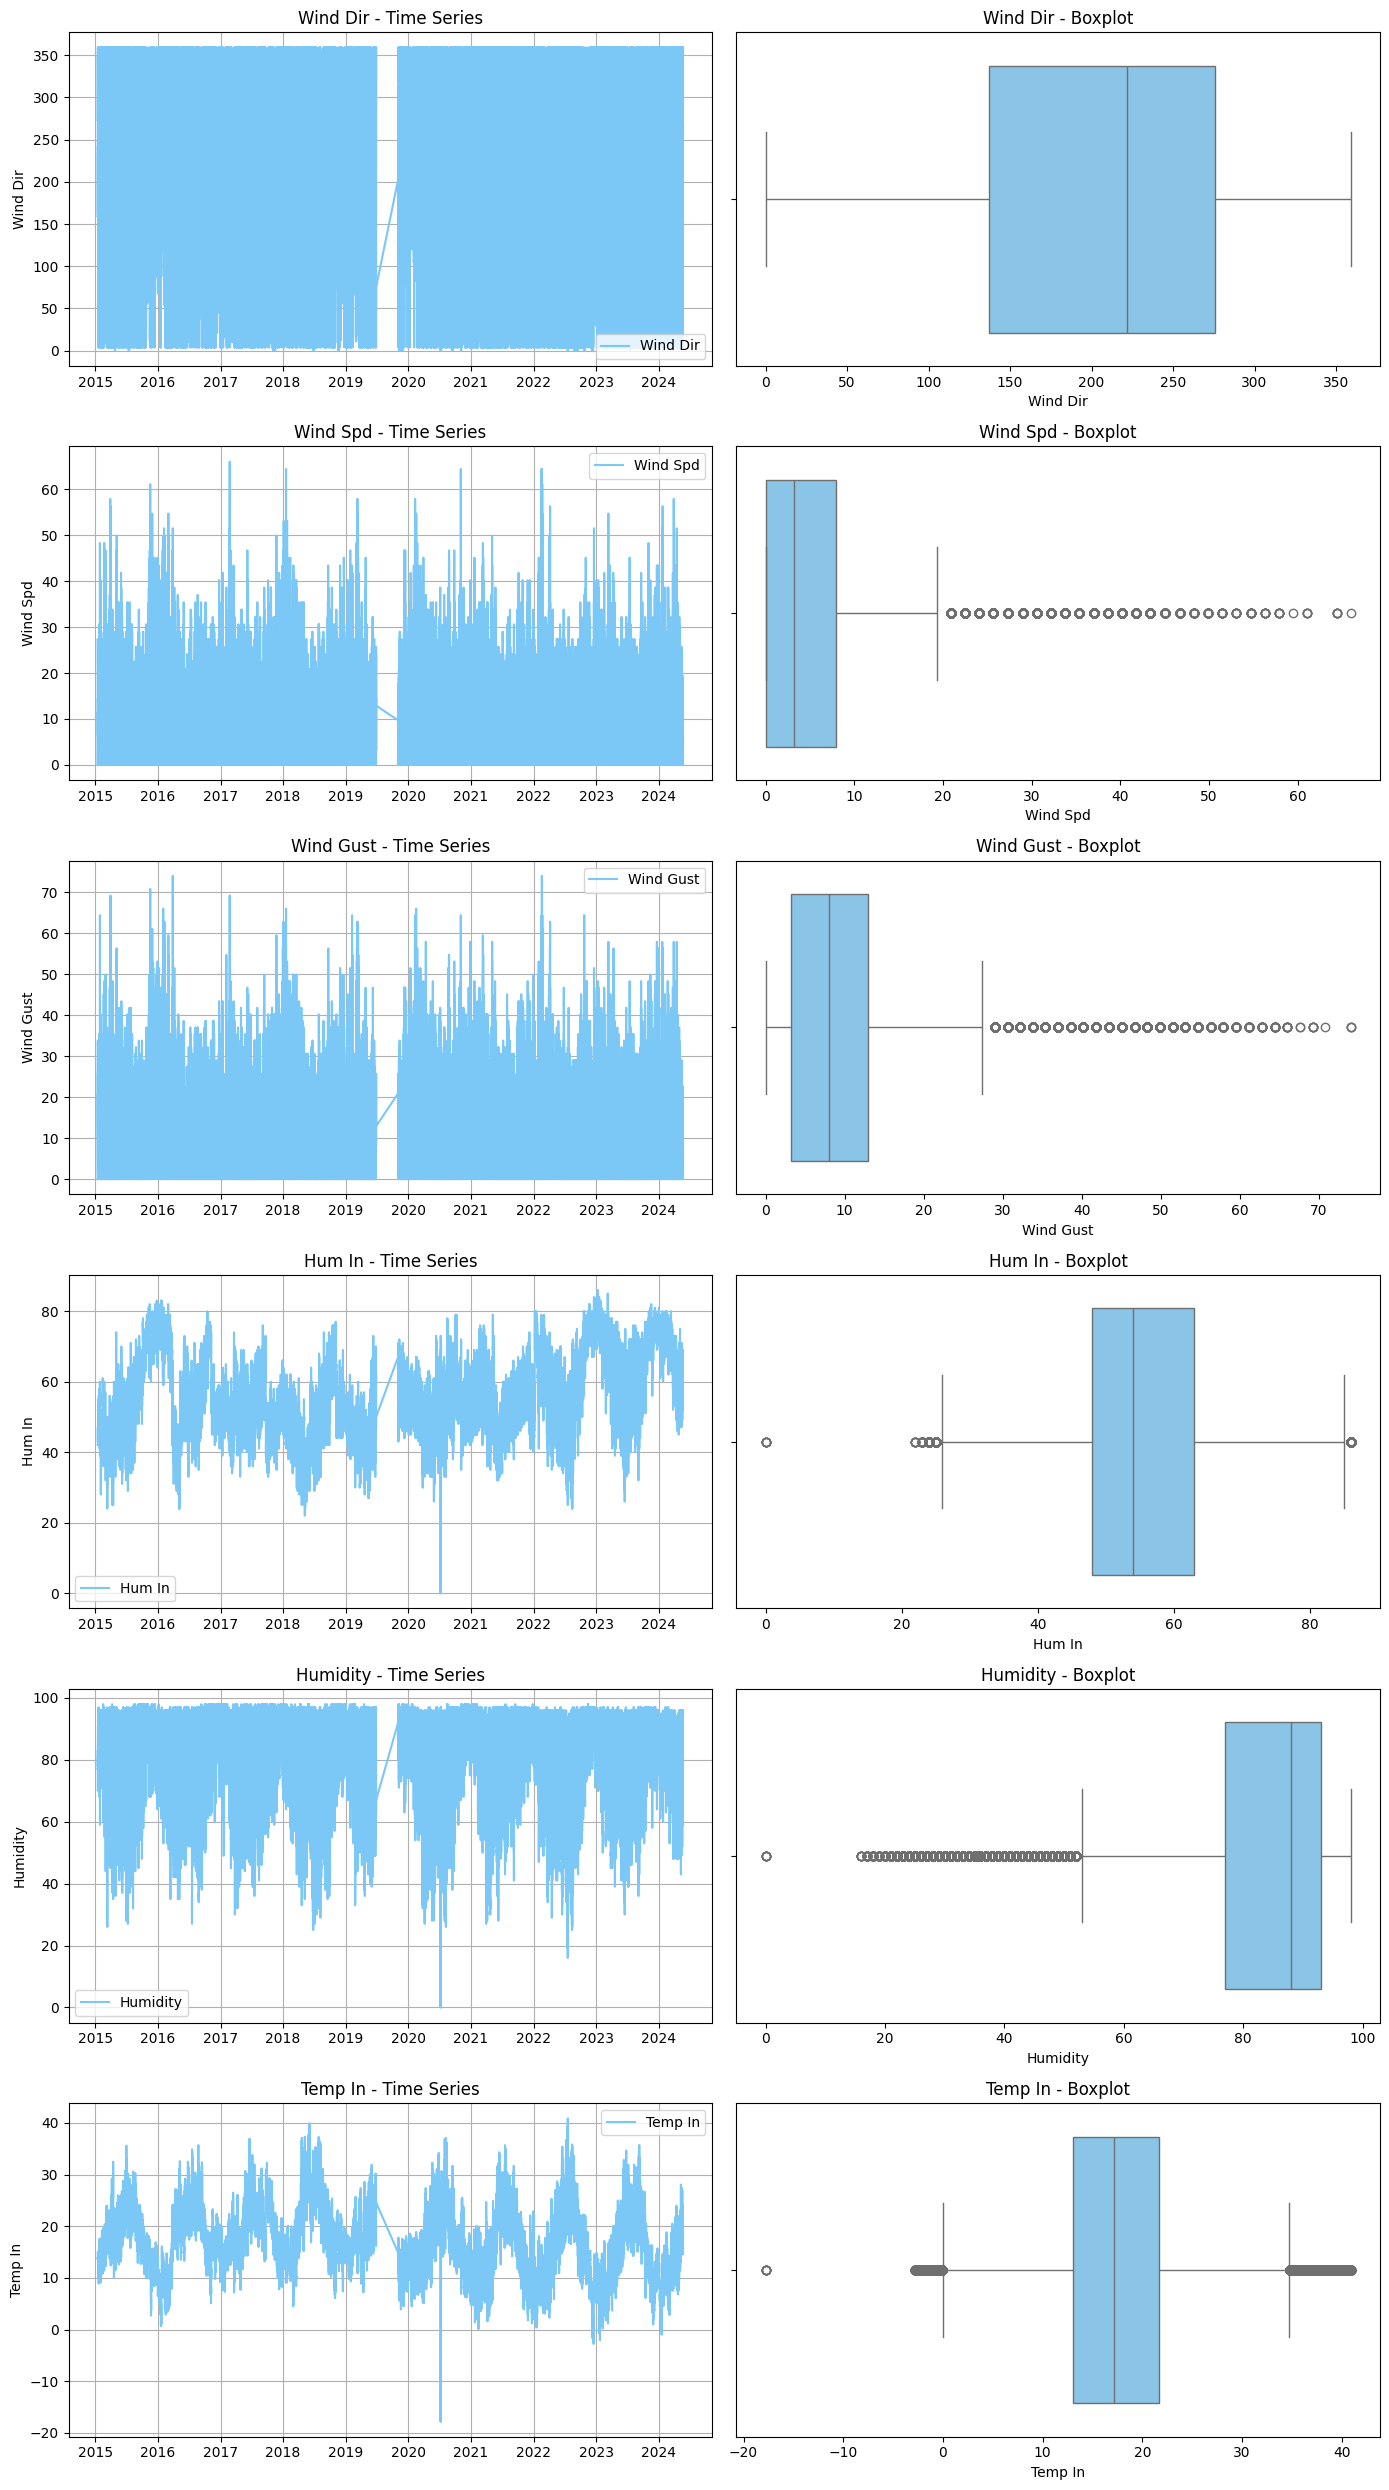

In [14]:
#First subplot for boxplots and Time Series of each variable
variables = ['Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Humidity', 'Temp In']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14,25), sharex=False)

for i, var in enumerate(variables):
    # Time Series Plot
    axes[i, 0].plot(met_data_copy.index, met_data_copy[var], label=var, color='xkcd:lightblue')
    axes[i, 0].set_title(f'{var} - Time Series')
    axes[i, 0].set_ylabel(var)
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # Boxplot
    sns.boxplot(x=met_data_copy[var], ax=axes[i, 1], color='xkcd:lightblue')
    axes[i, 1].set_title(f'{var} - Boxplot')
    axes[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()

<ipython-input-15-68553c8fd905>:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


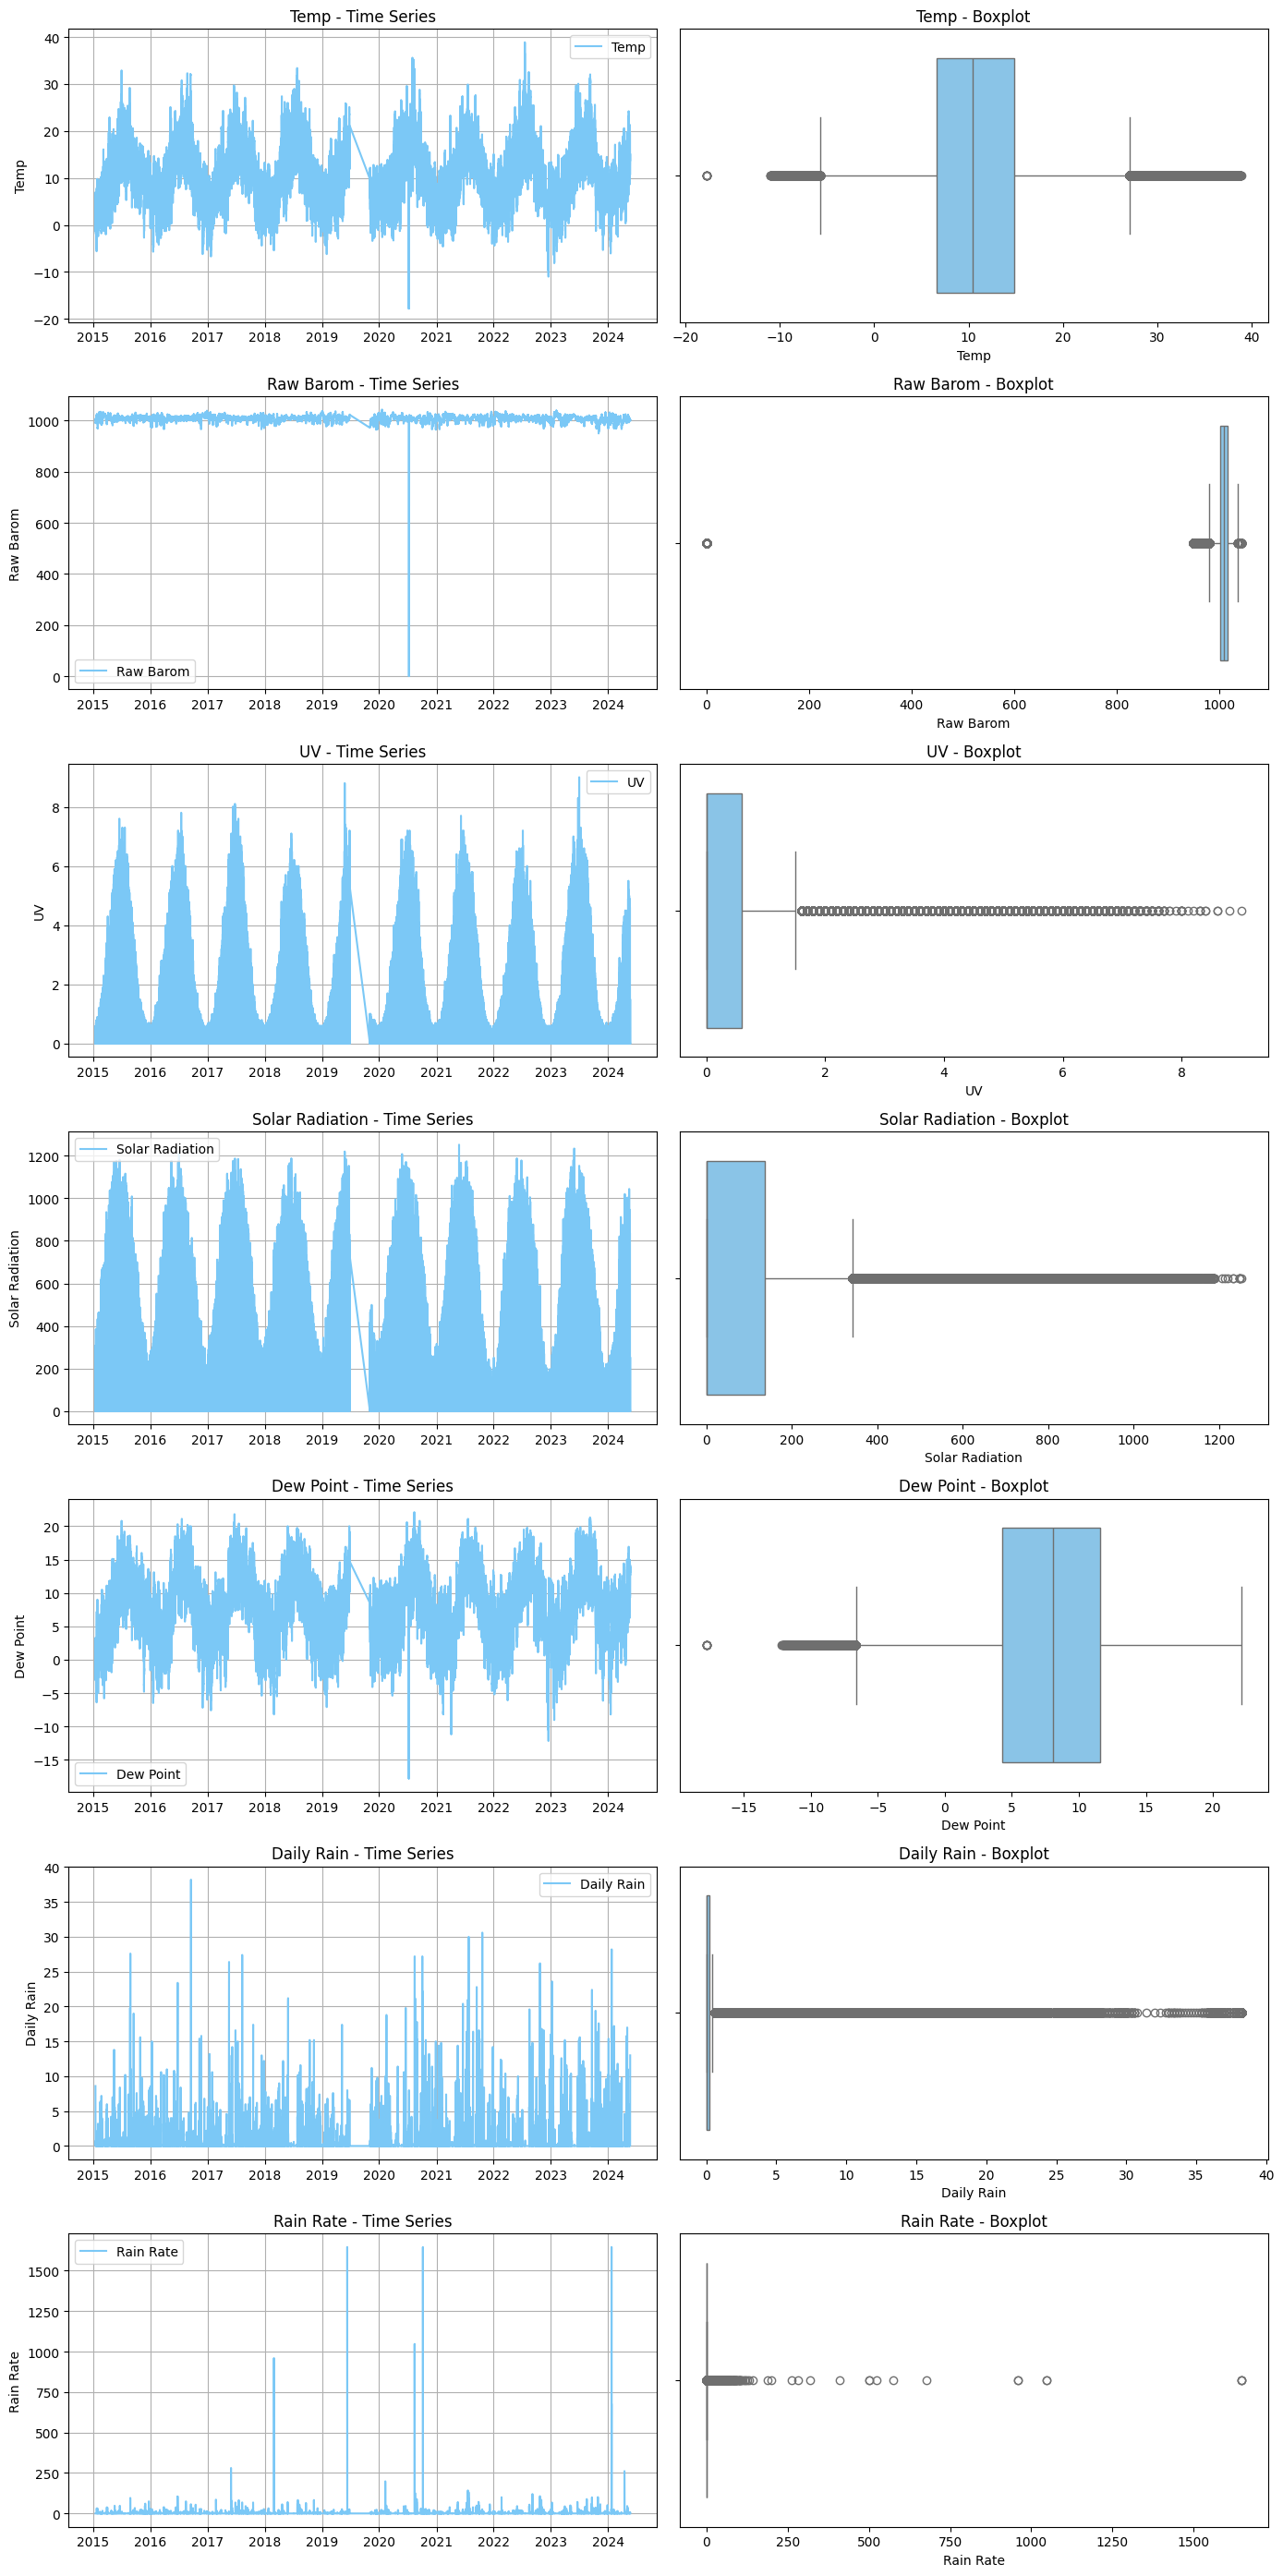

In [15]:
#Second subplot for Boxplots and Time Series of each variable
variables = ['Temp', 'Raw Barom', 'UV', 'Solar Radiation', 'Dew Point', 'Daily Rain', 'Rain Rate']
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14,28), sharex=False)

for i, var in enumerate(variables):
    # Time Series Plot
    axes[i, 0].plot(met_data_copy.index, met_data_copy[var], label=var, color='xkcd:lightblue')
    axes[i, 0].set_title(f'{var} - Time Series')
    axes[i, 0].set_ylabel(var)
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # Boxplot
    sns.boxplot(x=met_data_copy[var], ax=axes[i, 1], color='xkcd:lightblue')
    axes[i, 1].set_title(f'{var} - Boxplot')
    axes[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()

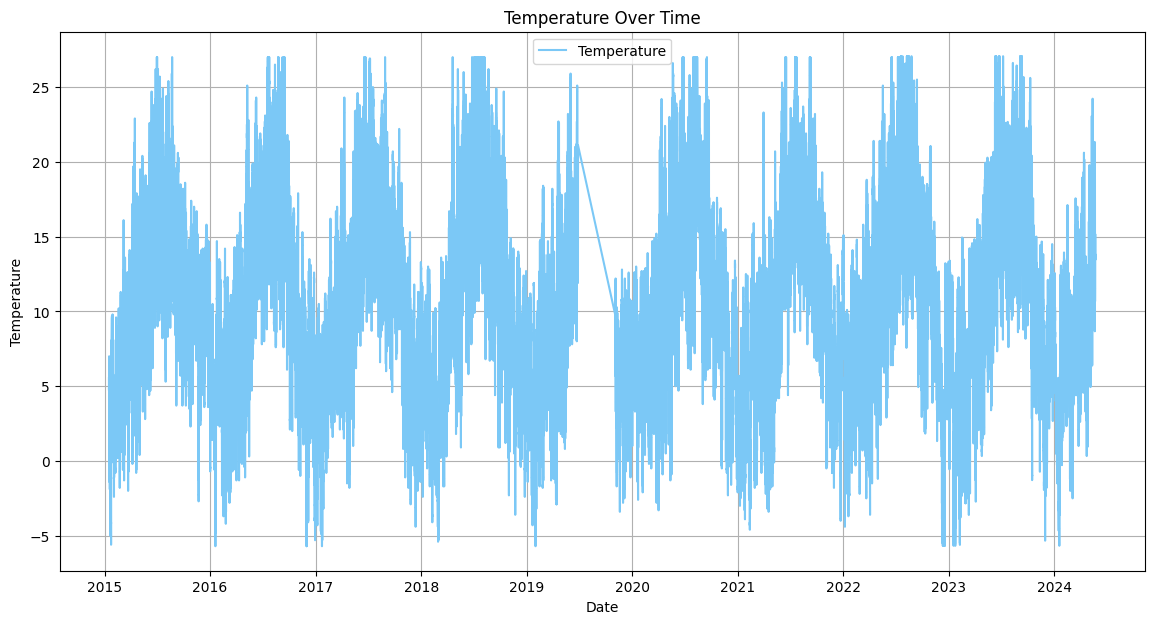

In [ ]:
#Attempting to use the interquartile range method to remove outliers in the data
q1_temp = met_data_copy['Temp'].quantile(0.25)
q3_temp = met_data_copy['Temp'].quantile(0.75)
iqr_temp = q3_temp - q1_temp

upper_limit_temp = q3_temp + 1.5 * iqr_temp
lower_limit_temp = q1_temp - 1.5 * iqr_temp
met_data_temp = met_data_copy[(met_data_copy['Temp'] > lower_limit_temp) & (met_data_copy['Temp'] < upper_limit_temp)]

plt.figure(figsize=(14, 7))
plt.plot(met_data_temp.index, met_data_temp['Temp'], label='Temperature', color='xkcd:lightblue')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

#This method of outlier removal will remove some high/low data points that are actually accurate according to met office

In [ ]:
#Inspecting all upper and lower outliers for Temperature
temp_outliers = met_data_copy[(met_data_copy['Temp'] < -10) | (met_data_copy['Temp'] > 30)]
temp_outliers

#confirmed all values as accurate except -17.8 Temp readings in July 2020

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In  \
2015-07-01 09:45:00     122.0       8.0       16.1    47.0      47.0    29.30   
2015-07-01 09:46:00     123.0       9.7       16.1    47.0      46.0    29.30   
2015-07-01 09:47:00     109.0      12.9       16.1    47.0      46.0    29.30   
2015-07-01 09:48:00     137.0       6.4       12.9    47.0      47.0    29.40   
2015-07-01 09:49:00     126.0      11.3       12.9    47.0      47.0    29.40   
...                       ...       ...        ...     ...       ...      ...   
2023-09-10 13:32:00     222.0      12.9       17.7    51.0      56.0    31.78   
2023-09-10 13:33:00     260.0      12.9       17.7    51.0      56.0    31.78   
2023-09-10 13:34:00     253.0       4.8       14.5    51.0      56.0    31.78   
2023-09-10 13:35:00     244.0       3.2       14.5    51.0      57.0    31.78   
2023-09-10 13:36:00     241.0       8.0       17.7    51.0      58.0    31.78   

                      Temp  Raw Barom   UV  Solar Radiation  Dew Point  \
2015-07-01 09:45:00  30.10    1005.00  4.3            684.0      17.50   
2015-07-01 09:46:00  30.10    1005.00  4.3            680.0      17.20   
2015-07-01 09:47:00  30.10    1005.00  4.3            684.0      17.20   
2015-07-01 09:48:00  30.10    1005.00  4.3            686.0      17.60   
2015-07-01 09:49:00  30.20    1004.90  4.3            686.0      17.60   
...                    ...        ...  ...              ...        ...   
2023-09-10 13:32:00  30.83    1006.45  2.3            462.0      21.05   
2023-09-10 13:33:00  30.67    1006.45  2.4            441.0      20.89   
2023-09-10 13:34:00  30.50    1006.42  2.4            425.0      20.74   
2023-09-10 13:35:00  30.28    1006.42  2.4            468.0      20.82   
2023-09-10 13:36:00  30.17    1006.38  2.3            448.0      21.00   

                     Daily Rain  Rain Rate  
2015-07-01 09:45:00         0.0        0.0  
2015-07-01 09:46:00         0.0        0.0  
2015-07-01 09:47:00         0.0        0.0  
2015-07-01 09:48:00         0.0        0.0  
2015-07-01 09:49:00         0.0        0.0  
...                         ...        ...  
2023-09-10 13:32:00         0.0        0.0  
2023-09-10 13:33:00         0.0        0.0  
2023-09-10 13:34:00         0.0        0.0  
2023-09-10 13:35:00         0.0        0.0  
2023-09-10 13:36:00         0.0        0.0  

[8908 rows x 13 columns]

In [85]:
#Inspecting all upper and lower outliers for Dew Point
dew_outliers = met_data_copy[(met_data_copy['Dew Point'] < -10)]
dew_outliers
#confirmed all values as accurate except -17.8 readings in July 2020

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In  \
2020-07-07 20:57:00      0.00      0.00       0.00    0.00      0.00   -17.80   
2020-07-07 20:58:00      0.00      0.00       0.00    0.00      0.00   -17.80   
2020-07-07 20:59:00      0.00      0.00       0.00    0.00      0.00   -17.80   
2020-07-07 21:03:00      0.00      0.00       0.00    0.00      0.00   -17.80   
2020-07-07 21:04:00      0.00      0.00       0.00    0.00      0.00   -17.80   
...                       ...       ...        ...     ...       ...      ...   
2022-12-17 04:40:00    289.00      0.00       0.00   67.00     93.00    -2.78   
2022-12-17 04:42:00    289.00      0.00       0.00   67.00     93.00    -2.78   
2022-12-17 04:53:00    289.00      0.00       0.00   67.00     93.00    -2.78   
2022-12-17 04:58:00    289.00      0.00       0.00   68.00     93.00    -2.78   
2022-12-17 05:00:00    289.00      0.00       0.00   68.00     93.00    -2.78   

                      Temp  Raw Barom   UV  Solar Radiation  Dew Point  \
2020-07-07 20:57:00 -17.80       0.00 0.00             0.00     -17.80   
2020-07-07 20:58:00 -17.80       0.00 0.00             0.00     -17.80   
2020-07-07 20:59:00 -17.80       0.00 0.00             0.00     -17.80   
2020-07-07 21:03:00 -17.80       0.00 0.00             0.00     -17.80   
2020-07-07 21:04:00 -17.80       0.00 0.00             0.00     -17.80   
...                    ...        ...  ...              ...        ...   
2022-12-17 04:40:00  -9.89    1013.96 0.00             0.00     -10.80   
2022-12-17 04:42:00  -9.89    1013.96 0.00             0.00     -10.80   
2022-12-17 04:53:00  -9.50    1013.99 0.00             0.00     -10.42   
2022-12-17 04:58:00  -9.33    1014.06 0.00             0.00     -10.25   
2022-12-17 05:00:00  -9.22    1014.02 0.00             0.00     -10.14   

                     Daily Rain  Rain Rate  
2020-07-07 20:57:00        0.00      -0.20  
2020-07-07 20:58:00        0.00      -0.20  
2020-07-07 20:59:00        0.00      -0.20  
2020-07-07 21:03:00        0.00      -0.20  
2020-07-07 21:04:00        0.00      -0.20  
...                         ...        ...  
2022-12-17 04:40:00        0.00       0.00  
2022-12-17 04:42:00        0.00       0.00  
2022-12-17 04:53:00        0.00       0.00  
2022-12-17 04:58:00        0.00       0.00  
2022-12-17 05:00:00        0.00       0.00  

[442 rows x 13 columns]

In [ ]:
#Inspect outliers for humidity
humidity = met_data_copy[met_data_copy['Humidity']<20]
humidity

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In  \
2020-07-07 20:57:00       0.0       0.0        0.0     0.0       0.0   -17.80   
2020-07-07 20:58:00       0.0       0.0        0.0     0.0       0.0   -17.80   
2020-07-07 20:59:00       0.0       0.0        0.0     0.0       0.0   -17.80   
2020-07-07 21:03:00       0.0       0.0        0.0     0.0       0.0   -17.80   
2020-07-07 21:04:00       0.0       0.0        0.0     0.0       0.0   -17.80   
...                       ...       ...        ...     ...       ...      ...   
2022-07-19 14:44:00     143.0      22.5       27.4    26.0      19.0    39.44   
2022-07-19 14:45:00     131.0      17.7       25.7    26.0      19.0    39.61   
2022-07-19 14:46:00     160.0       9.7       19.3    26.0      19.0    39.61   
2022-07-19 14:47:00     109.0      12.9       19.3    26.0      19.0    39.61   
2022-07-19 14:50:00     145.0      12.9       27.4    26.0      19.0    39.61   

                      Temp  Raw Barom   UV  Solar Radiation  Dew Point  \
2020-07-07 20:57:00 -17.80       0.00  0.0              0.0     -17.80   
2020-07-07 20:58:00 -17.80       0.00  0.0              0.0     -17.80   
2020-07-07 20:59:00 -17.80       0.00  0.0              0.0     -17.80   
2020-07-07 21:03:00 -17.80       0.00  0.0              0.0     -17.80   
2020-07-07 21:04:00 -17.80       0.00  0.0              0.0     -17.80   
...                    ...        ...  ...              ...        ...   
2022-07-19 14:44:00  38.28    1001.91  2.8            613.0      10.62   
2022-07-19 14:45:00  38.17    1001.91  2.8            612.0      10.53   
2022-07-19 14:46:00  38.06    1001.97  2.7            608.0      10.44   
2022-07-19 14:47:00  38.06    1001.94  2.7            608.0      10.44   
2022-07-19 14:50:00  38.00    1001.91  2.7            605.0      10.40   

                     Daily Rain  Rain Rate  
2020-07-07 20:57:00         0.0       -0.2  
2020-07-07 20:58:00         0.0       -0.2  
2020-07-07 20:59:00         0.0       -0.2  
2020-07-07 21:03:00         0.0       -0.2  
2020-07-07 21:04:00         0.0       -0.2  
...                         ...        ...  
2022-07-19 14:44:00         0.0        0.0  
2022-07-19 14:45:00         0.0        0.0  
2022-07-19 14:46:00         0.0        0.0  
2022-07-19 14:47:00         0.0        0.0  
2022-07-19 14:50:00         0.0        0.0  

[142 rows x 13 columns]

In [19]:
#Inspect outliers for Rain Rate
r = met_data_copy[met_data_copy['Rain Rate']>100]
r

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In  \
2016-06-23 17:38:00     289.0       8.0       11.3    65.0      94.0    25.50   
2017-05-30 09:10:00     218.0       8.0        8.0    59.0      88.0    21.80   
2018-02-28 13:49:00      93.0      22.5       29.0    38.0      68.0     9.10   
2019-06-11 11:34:00     343.0       6.4       11.3    66.0      88.0    20.00   
2020-02-09 15:32:00     238.0      19.3       48.3    50.0      92.0    17.50   
2020-08-14 08:17:00     337.0       1.6        3.2    69.0      97.0    20.70   
2020-08-14 08:18:00     337.0       4.8        6.4    69.0      97.0    20.70   
2020-08-14 08:19:00     337.0       0.0        4.8    69.0      97.0    20.70   
2020-08-14 08:20:00     337.0       6.4        6.4    69.0      97.0    20.70   
2020-08-17 16:20:00     241.0      17.7       30.6    67.0      84.0    25.40   
2020-08-17 16:21:00     262.0       1.6       24.1    67.0      84.0    25.40   
2020-08-17 16:23:00     193.0       9.7        9.7    67.0      85.0    25.40   
2020-08-17 16:24:00     175.0       6.4        9.7    67.0      86.0    25.40   
2020-10-06 10:28:00     255.0      11.3       17.7    74.0      85.0    16.30   
2021-07-20 16:25:00      79.0       4.8       16.1    42.0      80.0    33.80   
2021-07-25 15:48:00     120.0       6.4        8.0    48.0      84.0    26.70   
2022-02-20 18:19:00     284.0      61.1       61.1    76.0      94.0    13.30   
2022-09-05 22:26:00     266.0       4.8       11.3    61.0      88.0    22.94   
2022-09-05 22:27:00     214.0       4.8        6.4    61.0      88.0    22.94   
2022-10-23 16:46:00     225.0      17.7       30.6    74.0      88.0    19.94   
2023-10-28 23:13:00     182.0      11.3       12.9    73.0      96.0    15.50   
2024-01-24 01:06:00     228.0      37.0       56.3    76.0      74.0    13.89   
2024-01-24 01:15:00     243.0      24.1       41.8    75.0      73.0    13.78   
2024-01-24 01:22:00     287.0      30.6       33.8    75.0      73.0    13.78   
2024-01-24 01:26:00     227.0      19.3       41.8    75.0      73.0    13.72   
2024-01-24 02:27:00     237.0      27.4       33.8    74.0      75.0    13.72   
2024-01-24 02:49:00     199.0      22.5       35.4    73.0      75.0    13.61   
2024-01-24 02:52:00     303.0      17.7       41.8    73.0      75.0    13.61   
2024-01-24 08:00:00     233.0      27.4       38.6    71.0      79.0    12.50   
2024-04-15 09:05:00     254.0      11.3       19.3    62.0      89.0    12.89   

                      Temp  Raw Barom   UV  Solar Radiation  Dew Point  \
2016-06-23 17:38:00  18.50    1007.90  0.0              9.0      17.50   
2017-05-30 09:10:00  15.90    1007.80  1.9            236.0      13.90   
2018-02-28 13:49:00  -1.80    1010.50  1.1            545.0      -7.00   
2019-06-11 11:34:00  14.80    1005.20  1.7            239.0      12.80   
2020-02-09 15:32:00  12.70     978.80  0.0              5.0      11.40   
2020-08-14 08:17:00  16.20    1006.80  0.0             77.0      15.70   
2020-08-14 08:18:00  16.20    1006.80  0.5             67.0      15.70   
2020-08-14 08:19:00  16.20    1006.80  0.5             69.0      15.70   
2020-08-14 08:20:00  16.20    1006.90  0.5             70.0      15.70   
2020-08-17 16:20:00  19.00    1000.50  0.0             26.0      16.20   
2020-08-17 16:21:00  18.70    1000.70  0.0             32.0      15.90   
2020-08-17 16:23:00  18.30    1000.50  0.0             76.0      15.80   
2020-08-17 16:24:00  18.20    1000.40  0.0            102.0      15.80   
2020-10-06 10:28:00  13.50     990.10  0.7             81.0      11.00   
2021-07-20 16:25:00  22.60    1013.10  0.0             39.0      19.00   
2021-07-25 15:48:00  18.80    1000.90  0.0              5.0      16.00   
2022-02-20 18:19:00  10.90     985.60  0.0              0.0      10.00   
2022-09-05 22:26:00  18.78    1007.73  0.0              0.0      16.75   
2022-09-05 22:27:00  18.72    1007.59  0.0              0.0      16.70   
2022-10-23 16:46:00  13.83   

In [19]:
#Inspect outliers for daily rain
rain = met_data_copy[met_data_copy['Daily Rain']>30]
rain

#confirmed that there was flooding on 16th Sept 2016 in Hertfordshire

Wind Dir  Wind Spd  Wind Gust  Hum In  Humidity  Temp In  \
2016-09-16 06:28:00    284.00      1.60       4.80   59.00     96.00    24.20   
2016-09-16 06:29:00    284.00      6.40       8.00   59.00     96.00    24.20   
2016-09-16 06:30:00    312.00      8.00       9.70   59.00     96.00    24.20   
2016-09-16 06:31:00    285.00     12.90      12.90   59.00     96.00    24.20   
2016-09-16 06:32:00    282.00      6.40      12.90   59.00     96.00    24.20   
...                       ...       ...        ...     ...       ...      ...   
2021-10-20 23:56:00     71.00      4.80      20.90   51.00     94.00    16.60   
2021-10-20 23:57:00    263.00      6.40      16.10   52.00     94.00    16.60   
2021-10-20 23:58:00    294.00      8.00      12.90   53.00     94.00    16.70   
2021-10-20 23:58:00    337.00      9.70      19.30   53.00     94.00    16.70   
2021-10-21 00:00:00    287.00     12.90      19.30   53.00     94.00    16.70   

                     Temp  Raw Barom   UV  Solar Radiation  Dew Point  \
2016-09-16 06:28:00 16.30    1003.50 0.00             0.00      15.70   
2016-09-16 06:29:00 16.30    1003.60 0.00             0.00      15.70   
2016-09-16 06:30:00 16.30    1003.60 0.00             0.00      15.70   
2016-09-16 06:31:00 16.30    1003.60 0.00             0.00      15.60   
2016-09-16 06:32:00 16.30    1003.60 0.00             0.00      15.60   
...                   ...        ...  ...              ...        ...   
2021-10-20 23:56:00  8.40     984.10 0.00             0.00       7.50   
2021-10-20 23:57:00  8.40     984.10 0.00             0.00       7.50   
2021-10-20 23:58:00  8.40     984.10 0.00             0.00       7.50   
2021-10-20 23:58:00  8.40     984.10 0.00             0.00       7.50   
2021-10-21 00:00:00  8.40     984.10 0.00             0.00       7.50   

                     Daily Rain  Rain Rate  
2016-09-16 06:28:00       30.20      17.60  
2016-09-16 06:29:00       30.40      17.20  
2016-09-16 06:30:00       30.80      34.00  
2016-09-16 06:31:00       31.40      30.40  
2016-09-16 06:32:00       32.00      34.40  
...                         ...        ...  
2021-10-20 23:56:00       30.60       2.40  
2021-10-20 23:57:00       30.60       2.40  
2021-10-20 23:58:00       30.60       2.40  
2021-10-20 23:58:00       30.60       2.40  
2021-10-21 00:00:00       30.60       2.40  

[1066 rows x 13 columns]

In [11]:
#Remove the outlier datapoints
met_data_clean = met_data_copy[
    (met_data_copy['Temp'] != -17.8) &
    (met_data_copy['Dew Point'] != -17.8) &
    (met_data_copy['Humidity'] != 0) &
    (met_data_copy['Raw Barom'] != 0) &
    (met_data_copy['Rain Rate'] <= 100)
]

<ipython-input-15-39bd9c1516b6>:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


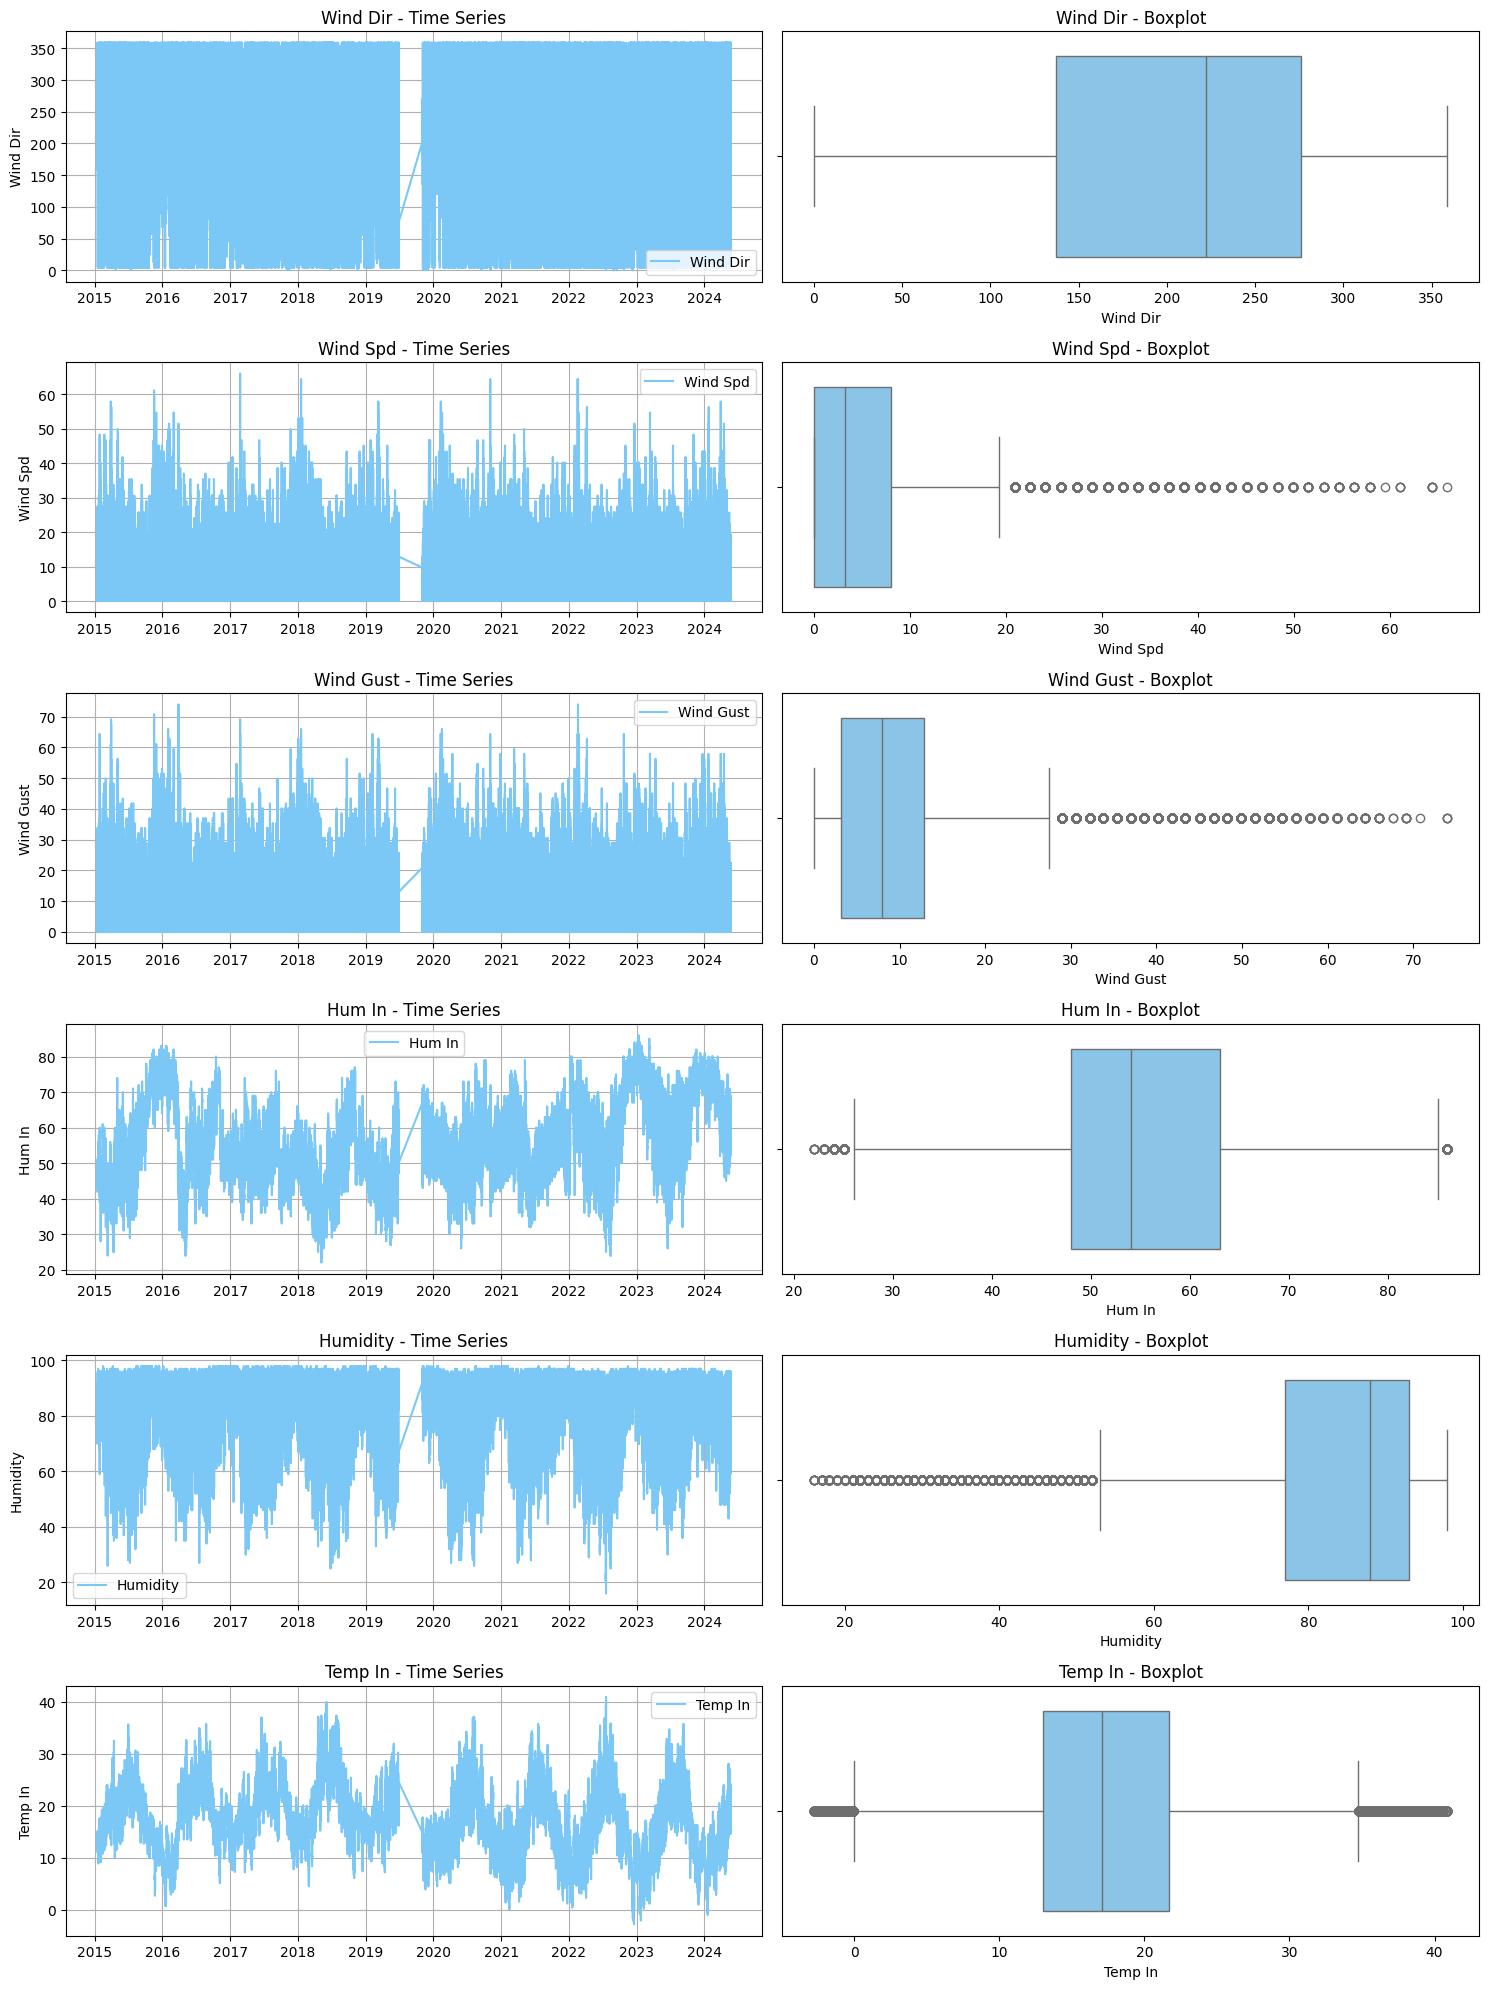

In [15]:
#Plot data after removing outliers
variables = ['Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Humidity', 'Temp In']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20), sharex=False)

for i, var in enumerate(variables):
    # Time Series Plot
    axes[i, 0].plot(met_data_clean.index, met_data_clean[var], label=var, color='xkcd:lightblue')
    axes[i, 0].set_title(f'{var} - Time Series')
    axes[i, 0].set_ylabel(var)
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # Boxplot
    sns.boxplot(x=met_data_clean[var], ax=axes[i, 1], color='xkcd:lightblue')
    axes[i, 1].set_title(f'{var} - Boxplot')
    axes[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()

<ipython-input-16-e05f4e2891ae>:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


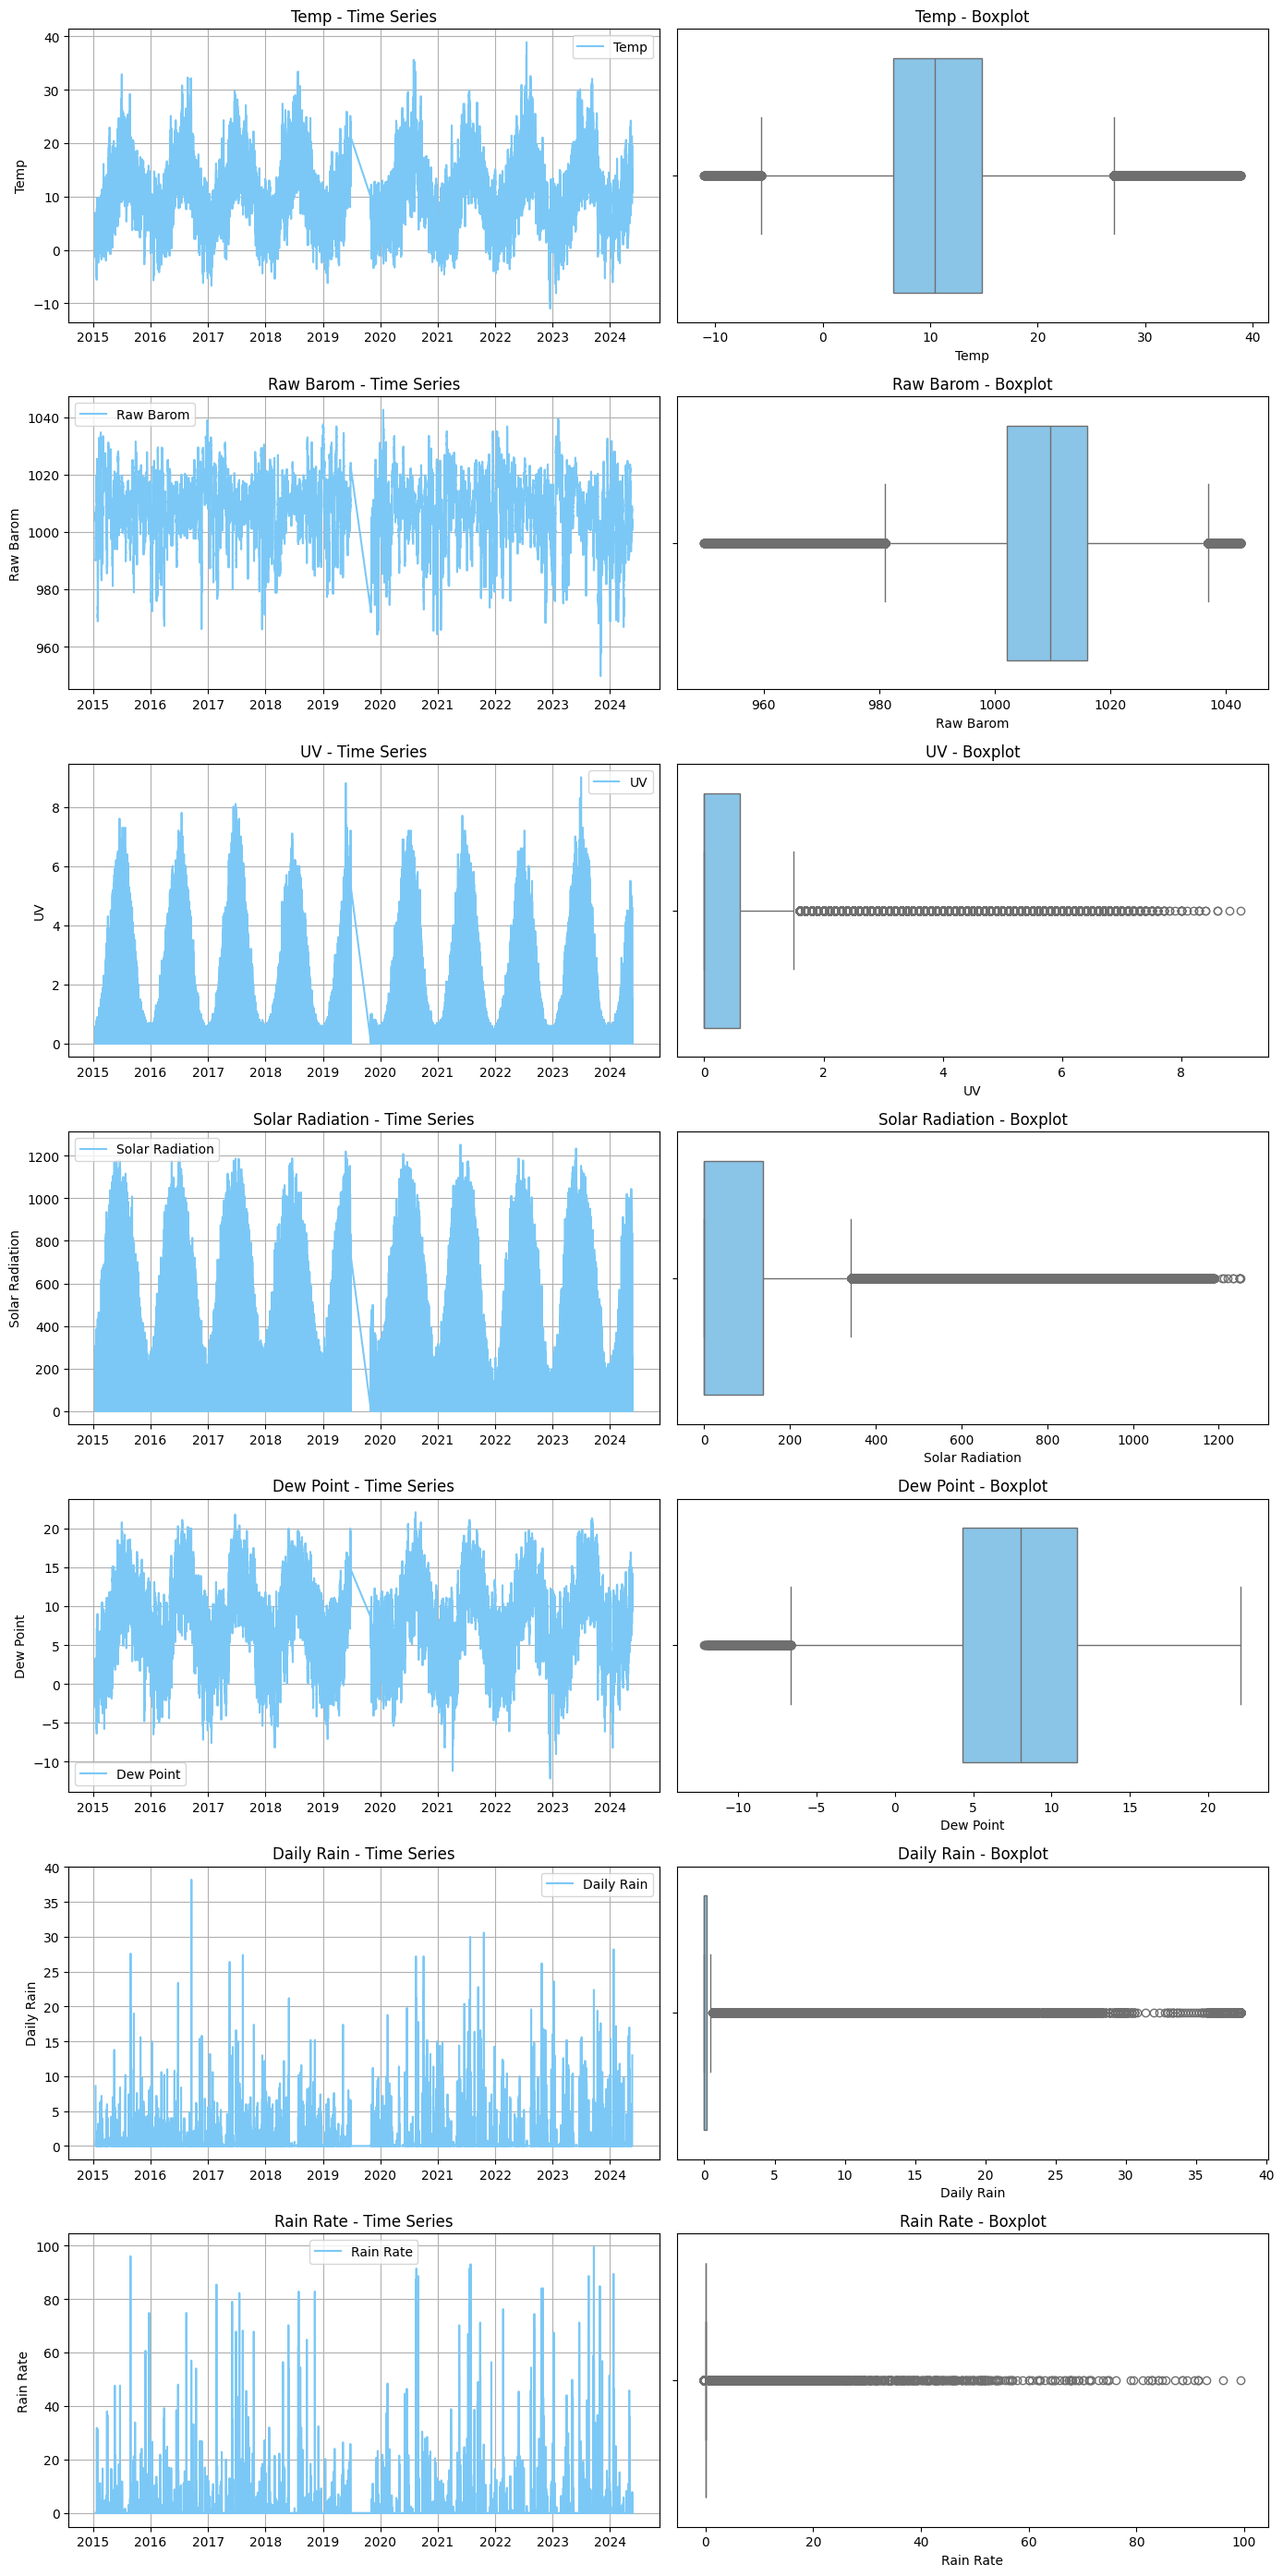

In [16]:
#Second subplot
variables = ['Temp', 'Raw Barom', 'UV', 'Solar Radiation', 'Dew Point', 'Daily Rain', 'Rain Rate']
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14,28), sharex=False)

for i, var in enumerate(variables):
    # Time Series Plot
    axes[i, 0].plot(met_data_clean.index, met_data_clean[var], label=var, color='xkcd:lightblue')
    axes[i, 0].set_title(f'{var} - Time Series')
    axes[i, 0].set_ylabel(var)
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # Boxplot
    sns.boxplot(x=met_data_clean[var], ax=axes[i, 1], color='xkcd:lightblue')
    axes[i, 1].set_title(f'{var} - Boxplot')
    axes[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()

In [17]:
#Ensure that there are no missing values in the daily average data
daily_data_clean = met_data_clean.resample('D').mean()
daily_data_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3414 entries, 2015-01-16 to 2024-05-21
Freq: D
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wind Dir         3283 non-null   float64
 1   Wind Spd         3283 non-null   float64
 2   Wind Gust        3283 non-null   float64
 3   Hum In           3283 non-null   float64
 4   Humidity         3283 non-null   float64
 5   Temp In          3283 non-null   float64
 6   Temp             3283 non-null   float64
 7   Raw Barom        3283 non-null   float64
 8   UV               3283 non-null   float64
 9   Solar Radiation  3283 non-null   float64
 10  Dew Point        3283 non-null   float64
 11  Daily Rain       3283 non-null   float64
 12  Rain Rate        3283 non-null   float64
dtypes: float64(13)
memory usage: 373.4 KB


In [18]:
#Replace missing values with average of the other corresponding days in the dataset
daily_data_clean['DayOfYear'] = daily_data_clean.index.dayofyear
averages = daily_data_clean.groupby('DayOfYear').mean()

#Call the function to fill missing rows
daily_data_clean = daily_data_clean.apply(lambda row: fill_missing(row, averages), axis=1)
daily_data_clean.drop(columns=['DayOfYear'], inplace=True)

daily_data_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3414 entries, 2015-01-16 to 2024-05-21
Freq: D
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wind Dir         3414 non-null   float64
 1   Wind Spd         3414 non-null   float64
 2   Wind Gust        3414 non-null   float64
 3   Hum In           3414 non-null   float64
 4   Humidity         3414 non-null   float64
 5   Temp In          3414 non-null   float64
 6   Temp             3414 non-null   float64
 7   Raw Barom        3414 non-null   float64
 8   UV               3414 non-null   float64
 9   Solar Radiation  3414 non-null   float64
 10  Dew Point        3414 non-null   float64
 11  Daily Rain       3414 non-null   float64
 12  Rain Rate        3414 non-null   float64
dtypes: float64(13)
memory usage: 373.4 KB


## **Time Series Analysis**

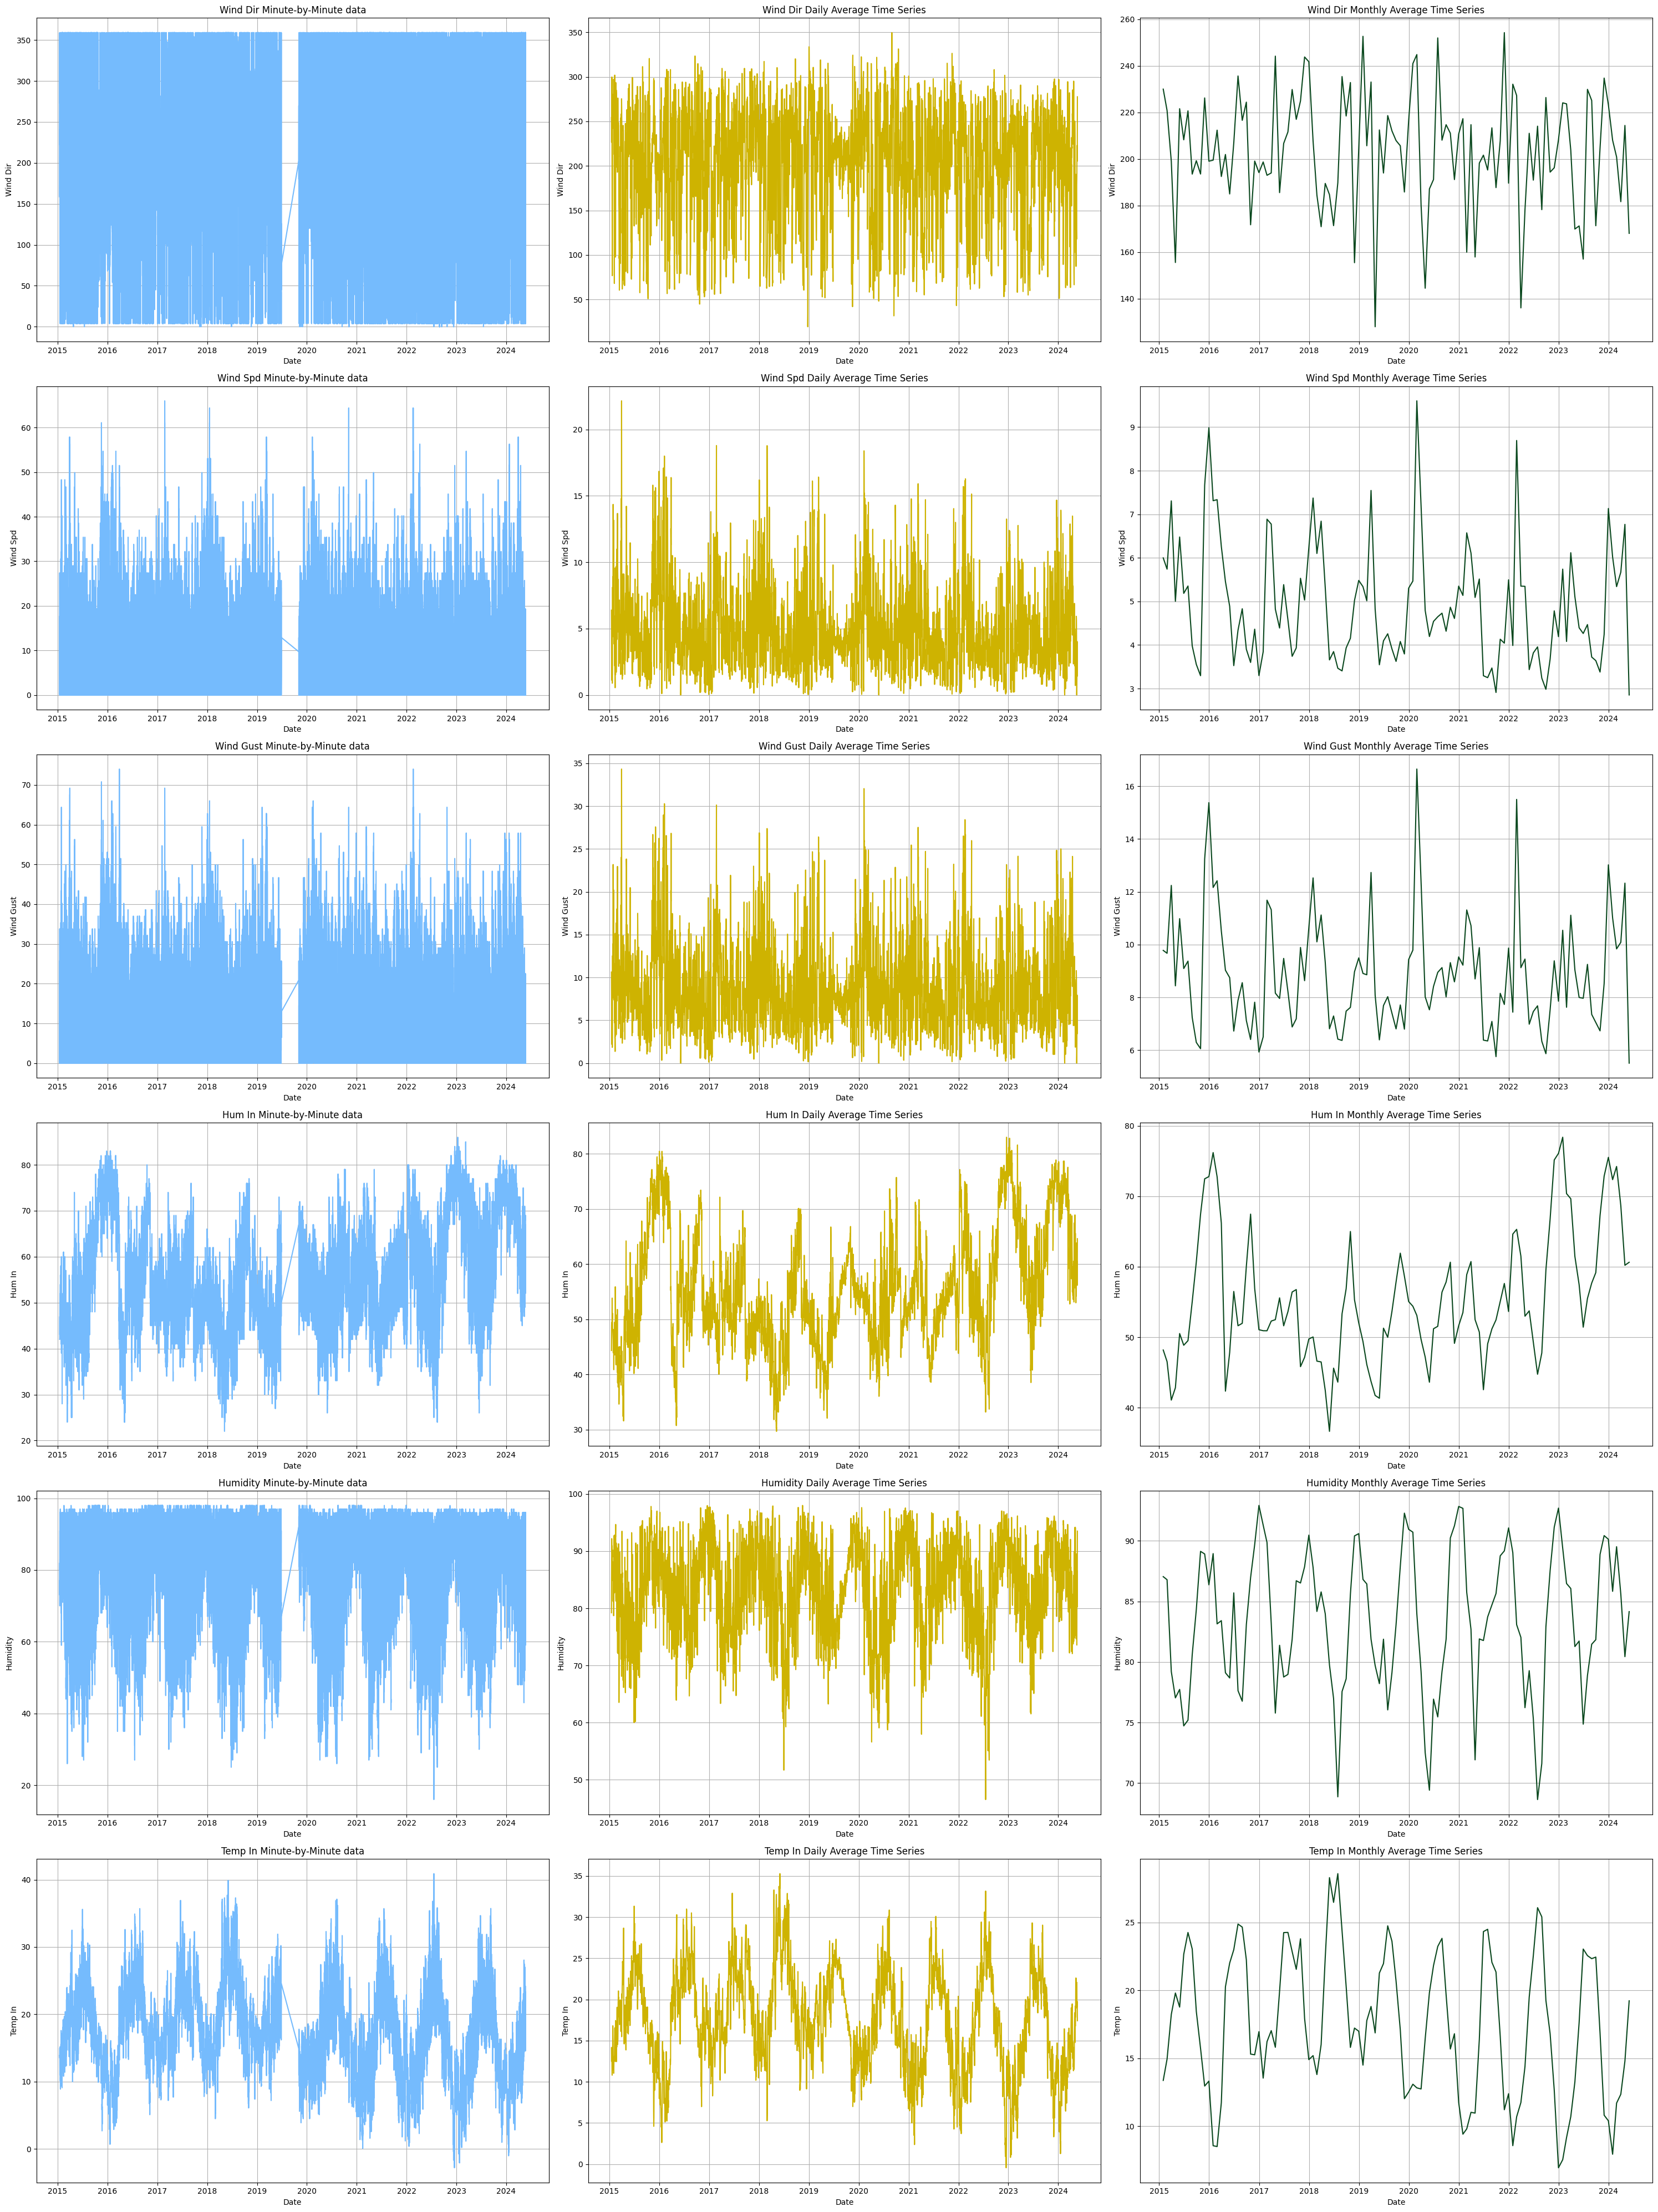

In [19]:
def plot_time_series(data, variables):
    num_rows = len(variables)
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(30, 40))

    for i, var in enumerate(variables):

        # Plot the original time series data
        axes[i, 0].plot(data.index, data[var], color='xkcd:sky blue')
        axes[i, 0].set_title(f'{var} Minute-by-Minute data')
        axes[i, 0].set_xlabel('Date')
        axes[i, 0].set_ylabel(var)
        axes[i, 0].grid(True)

        #daily average
        daily_data = data.resample('D').mean()
        daily_data['DayOfYear'] = daily_data.index.dayofyear
        averages = daily_data.groupby('DayOfYear').mean()

        daily_data = daily_data.apply(lambda row: fill_missing(row, averages), axis=1)
        daily_data.drop(columns=['DayOfYear'], inplace=True)

        axes[i, 1].plot(daily_data.index, daily_data[var], color='xkcd:mustard')
        axes[i, 1].set_title(f'{var} Daily Average Time Series')
        axes[i, 1].set_xlabel('Date')
        axes[i, 1].set_ylabel(var)
        axes[i, 1].grid(True)

        #monthly average
        monthly_avg = daily_data.resample('M').mean()
        axes[i, 2].plot(monthly_avg.index, monthly_avg[var], color='xkcd:pine green')
        axes[i, 2].set_title(f'{var} Monthly Average Time Series')
        axes[i, 2].set_xlabel('Date')
        axes[i, 2].set_ylabel(var)
        axes[i, 2].grid(True)

    plt.tight_layout()
    plt.show()

variables = ['Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Humidity', 'Temp In']
plot_time_series(met_data_clean, variables)

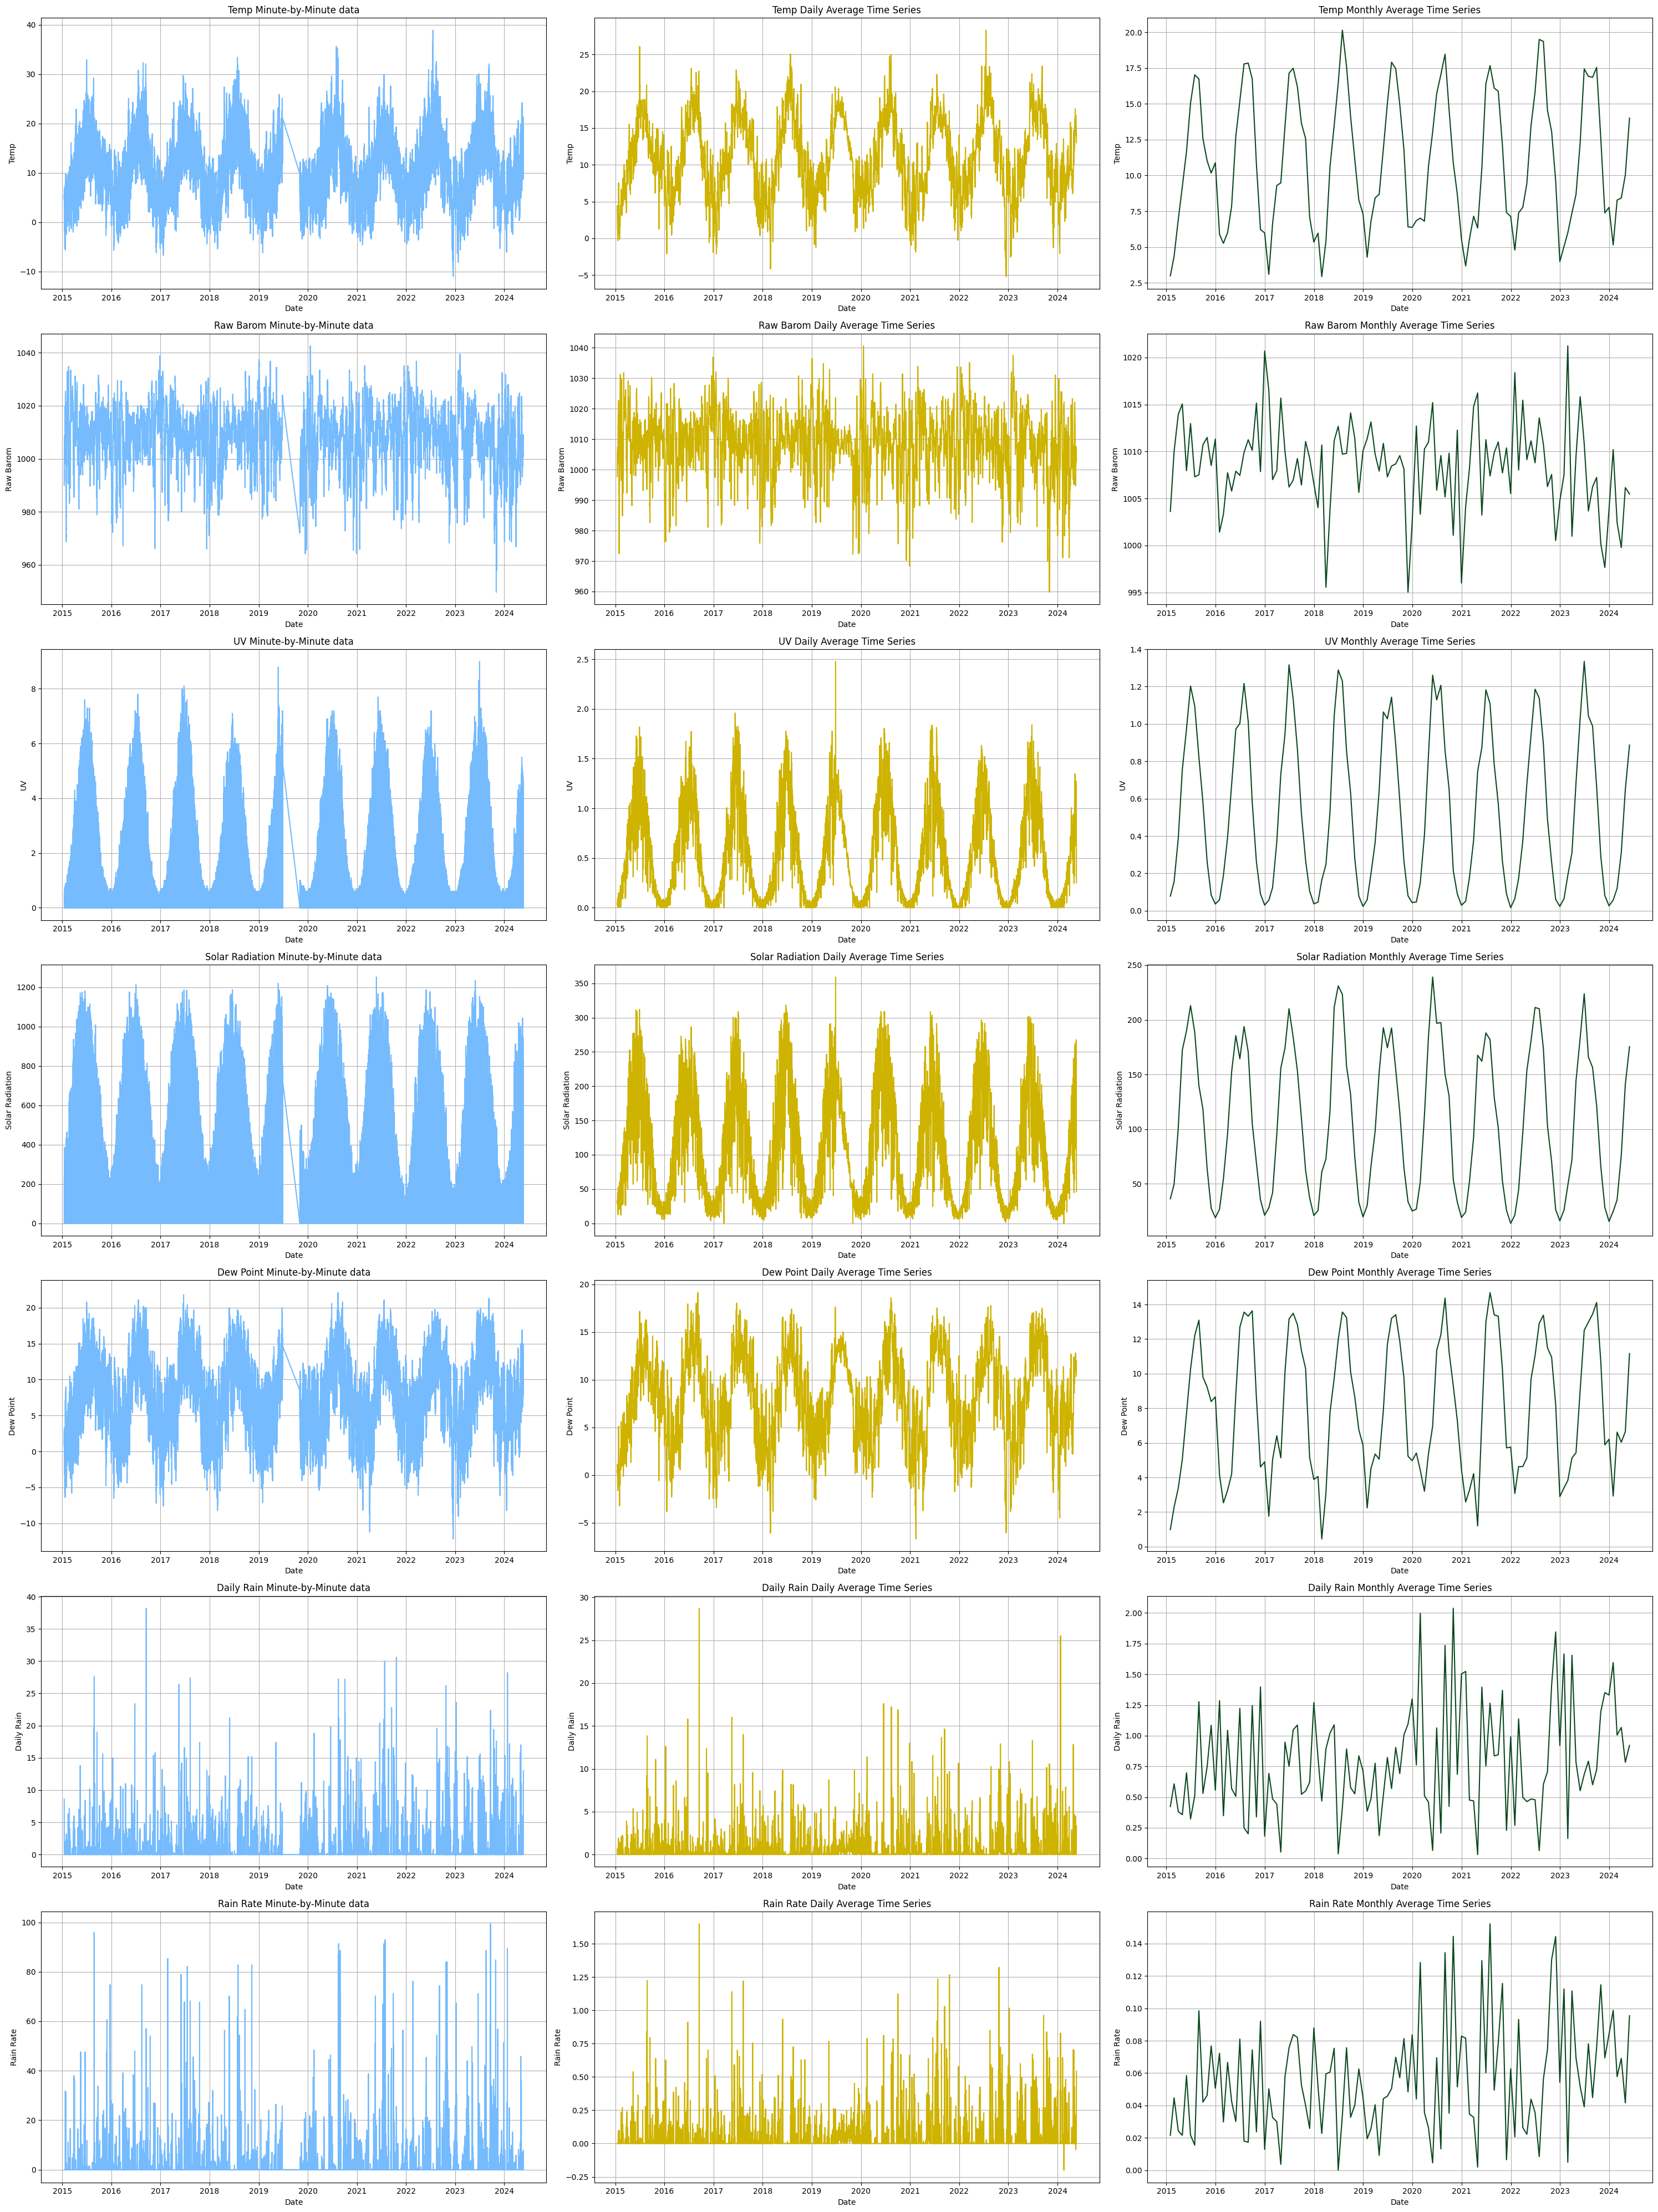

In [36]:
#Plot second set of data
variables = ['Temp', 'Raw Barom', 'UV', 'Solar Radiation', 'Dew Point', 'Daily Rain', 'Rain Rate']
plot_time_series(met_data_clean, variables)

## **Feature Selection**

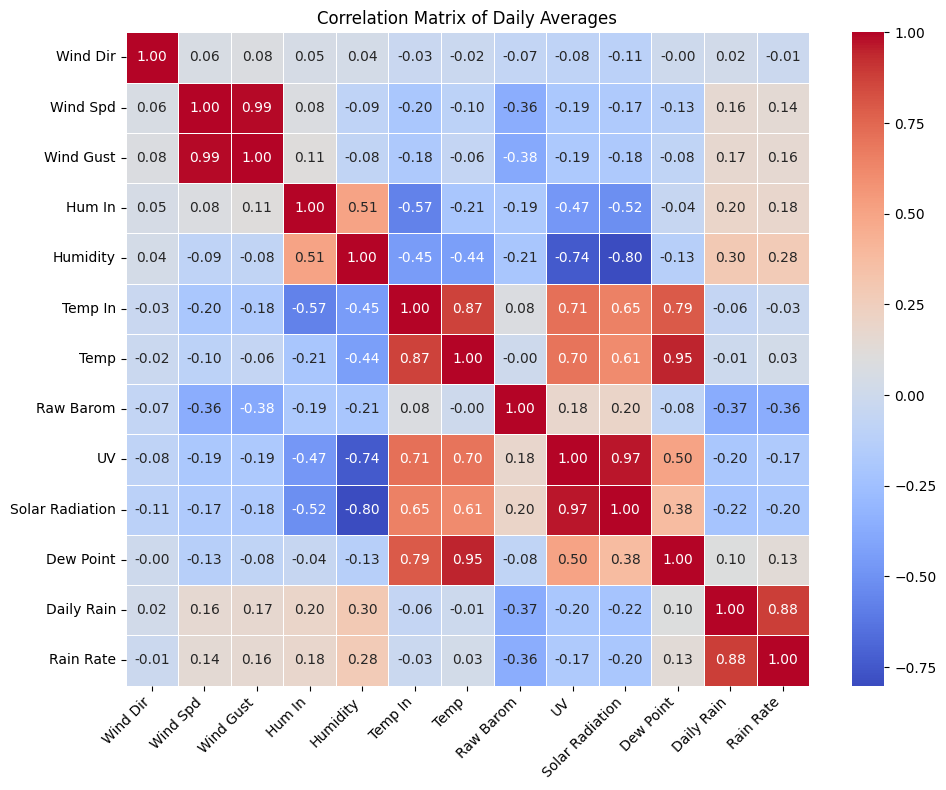

In [20]:
correlation_matrix = daily_data_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Daily Averages')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Temperature**

In [21]:
# Performing ANOVA F-test for feature selection
X = daily_data_clean.drop(columns=['Temp'])
y = daily_data_clean['Temp']

f_values, p_values = f_regression(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
print(feature_scores.sort_values(by='F-Value', ascending=False))

            Feature       F-Value        P-Value
9         Dew Point  28945.093246   0.000000e+00
5           Temp In  10419.433768   0.000000e+00
7                UV   3243.671468   0.000000e+00
8   Solar Radiation   1985.676438   0.000000e+00
4          Humidity    808.971409  7.135570e-160
3            Hum In    151.731946   3.814289e-34
1          Wind Spd     36.728087   1.506072e-09
2         Wind Gust     13.146204   2.923127e-04
11        Rain Rate      2.748919   9.741212e-02
0          Wind Dir      1.746826   1.863649e-01
10       Daily Rain      0.177561   6.735038e-01
6         Raw Barom      0.043524   8.347537e-01


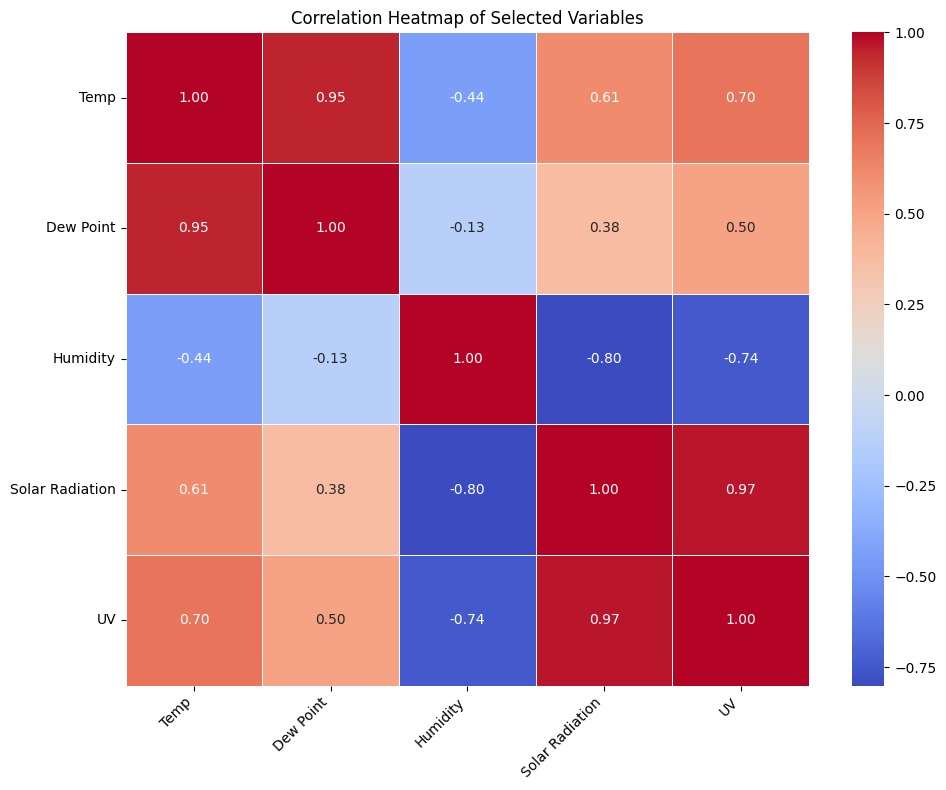

In [22]:
#Plotting heatmap after feature selection
variables = ['Temp', 'Dew Point', 'Humidity', 'Solar Radiation', 'UV']
subset_df = daily_data_clean[variables]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Humidity**

In [23]:
# Performing ANOVA F-test for feature selection
X = daily_data_clean.drop(columns=['Humidity'])
y = daily_data_clean['Humidity']

f_values, p_values = f_regression(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
print(feature_scores.sort_values(by='F-Value', ascending=False))

            Feature      F-Value        P-Value
8   Solar Radiation  6104.894295   0.000000e+00
7                UV  4192.333048   0.000000e+00
3            Hum In  1182.675411  8.637217e-223
4           Temp In   870.718357  1.204280e-170
5              Temp   806.700381  1.789210e-159
10       Daily Rain   327.385300   6.014250e-70
11        Rain Rate   196.503609   1.898827e-43
9         Dew Point    54.298791   2.149264e-13
6         Raw Barom    38.791586   5.290369e-10
1          Wind Spd    28.070490   1.243908e-07
2         Wind Gust    19.875761   8.530202e-06
0          Wind Dir     4.360387   3.685793e-02


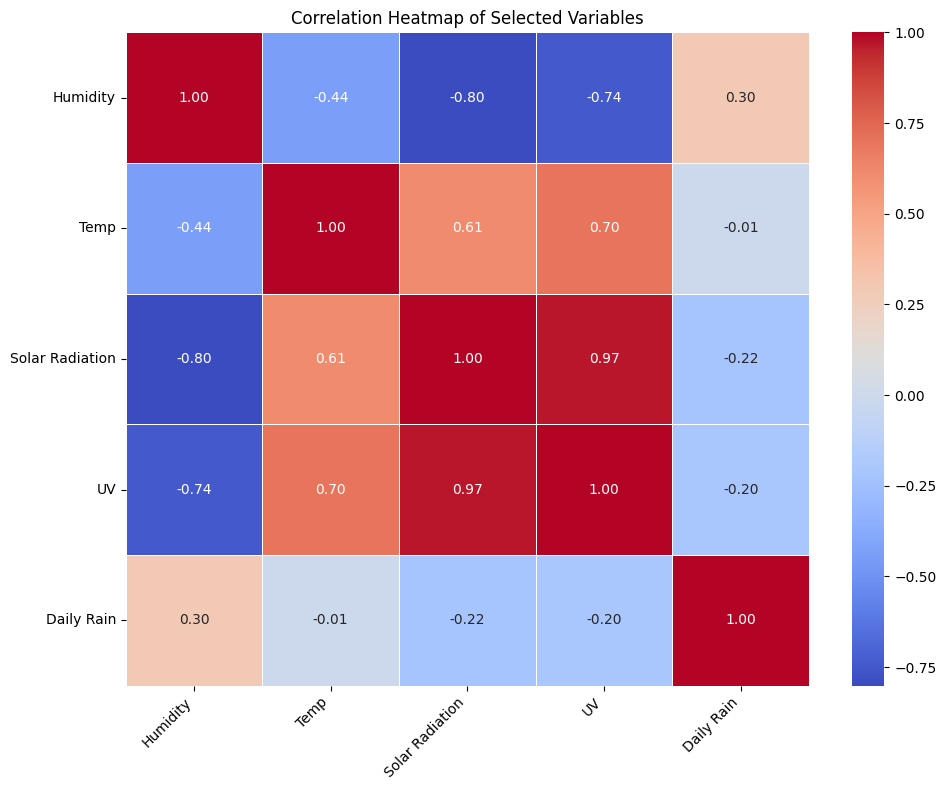

In [24]:
#Plotting heatmap after feature selection
variables = ['Humidity', 'Temp', 'Solar Radiation', 'UV', 'Daily Rain']
subset_df = daily_data_clean[variables]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Daily Rain**

In [51]:
# Performing ANOVA F-test for feature selection
X = daily_data_clean.drop(columns=['Daily Rain'])
y = daily_data_clean['Daily Rain']

f_values, p_values = f_regression(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
print(feature_scores.sort_values(by='F-Value', ascending=False))

            Feature       F-Value        P-Value
11        Rain Rate  11936.667595   0.000000e+00
7         Raw Barom    535.348134  3.843788e-110
4          Humidity    325.938214   1.166350e-69
9   Solar Radiation    178.454816   1.030906e-39
8                UV    143.170028   2.374206e-32
3            Hum In    135.374599   1.031339e-30
2         Wind Gust    100.178903   2.905602e-23
1          Wind Spd     88.158648   1.070902e-20
10        Dew Point     31.414751   2.249352e-08
5           Temp In     11.387900   7.474956e-04
0          Wind Dir      0.900087   3.428257e-01
6              Temp      0.179233   6.720601e-01


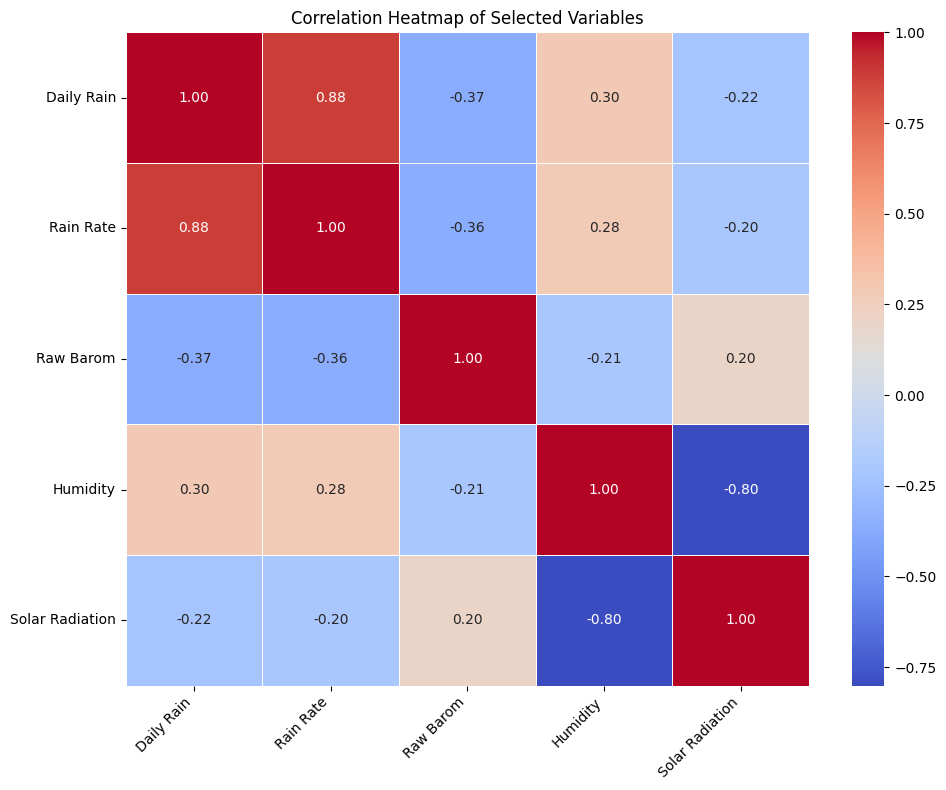

In [177]:
#Plotting heatmap after feature selection
variables = ['Daily Rain', 'Rain Rate', 'Raw Barom', 'Humidity', 'Solar Radiation']
subset_df = daily_data_clean[variables]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **Normalising/Standardising**

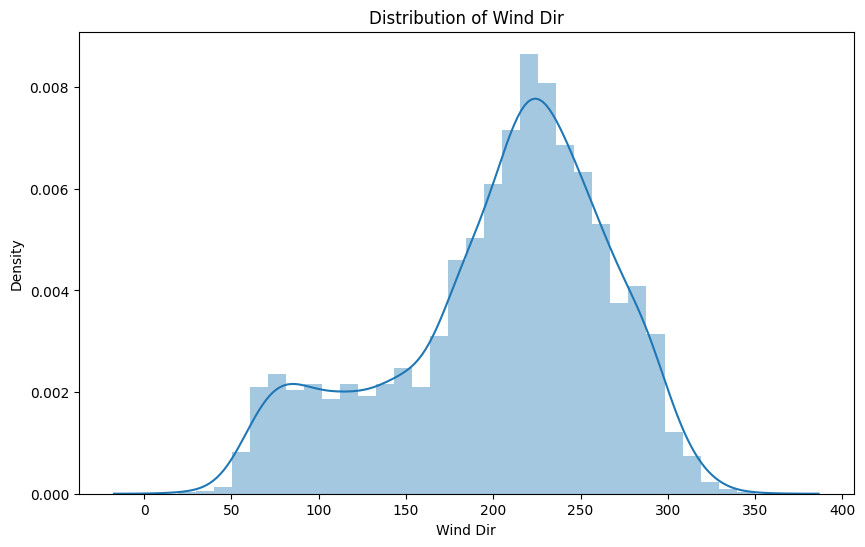

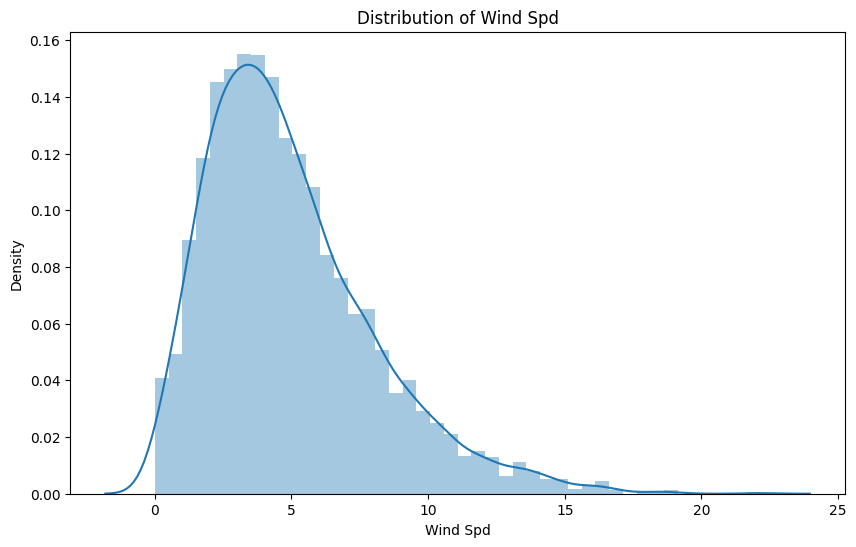

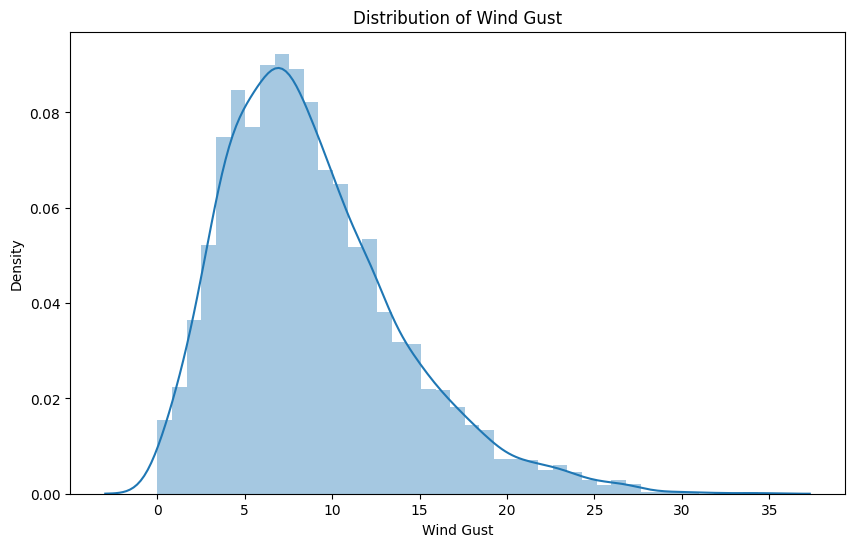

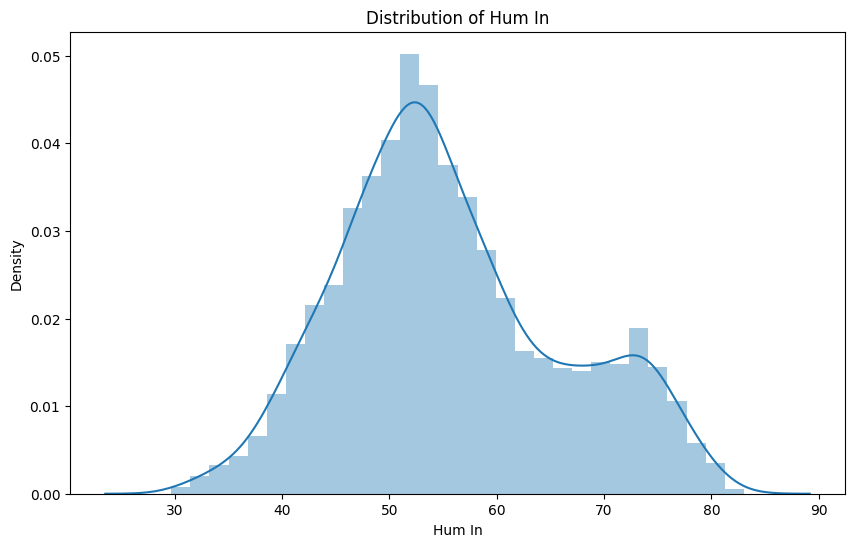

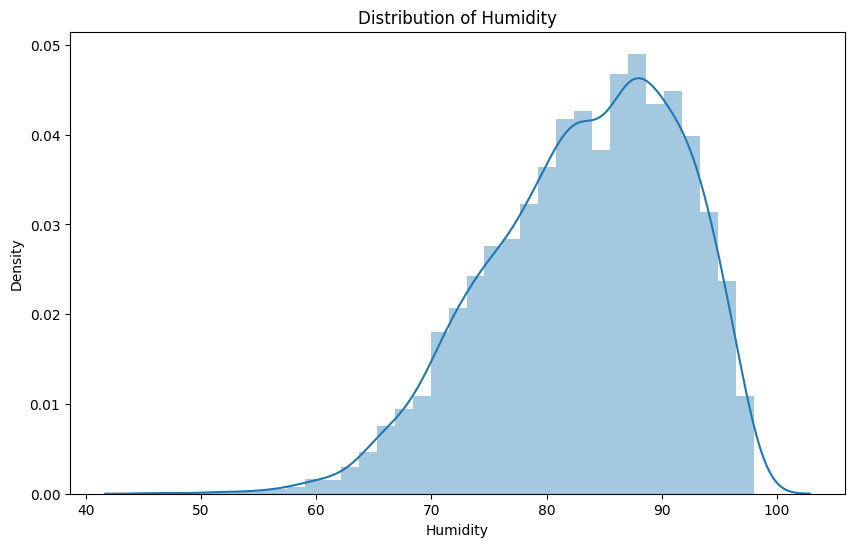

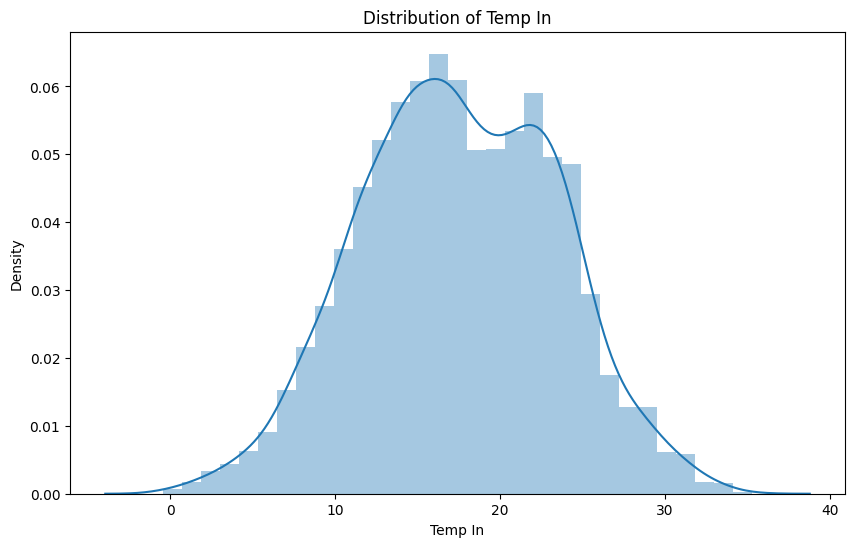

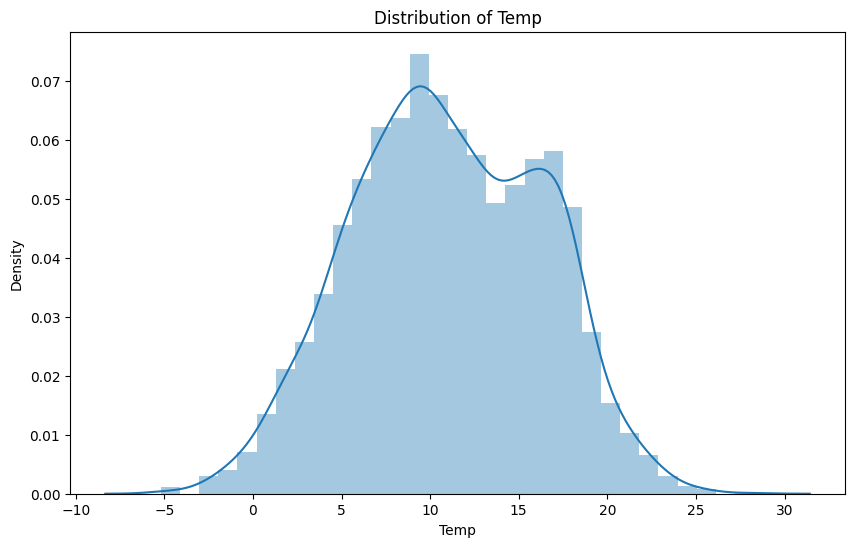

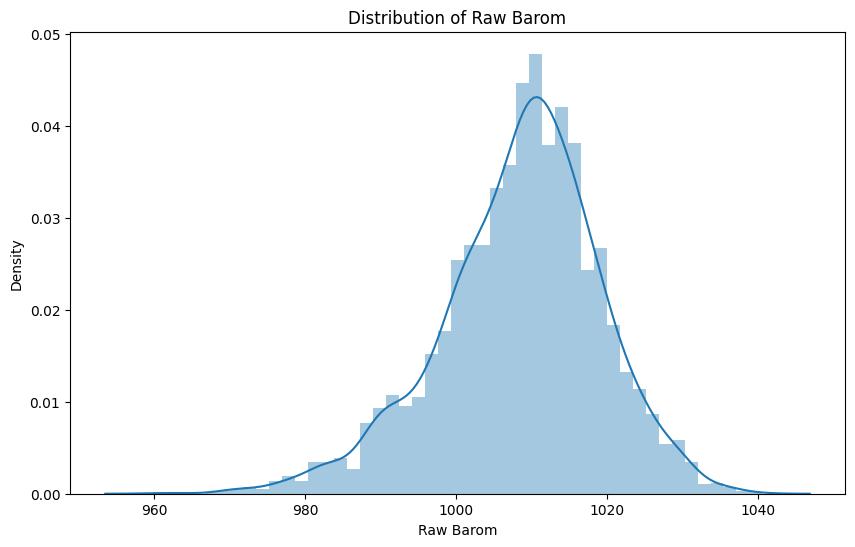

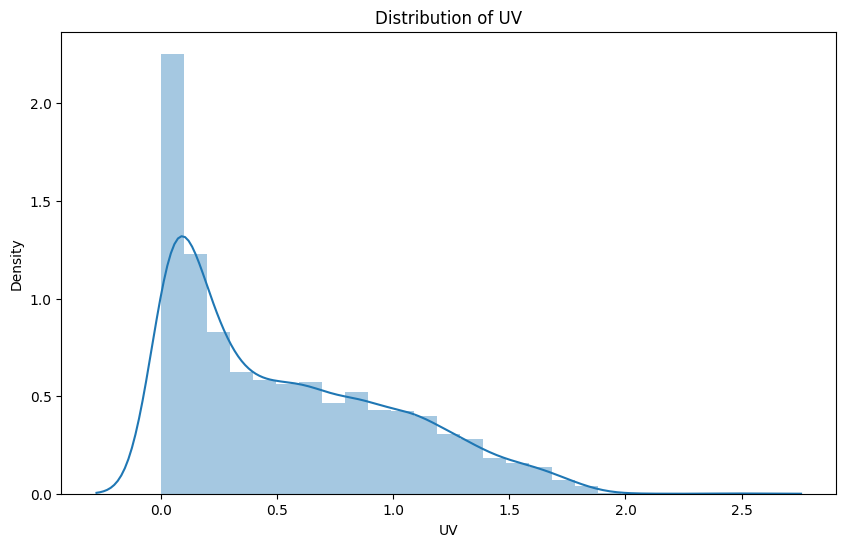

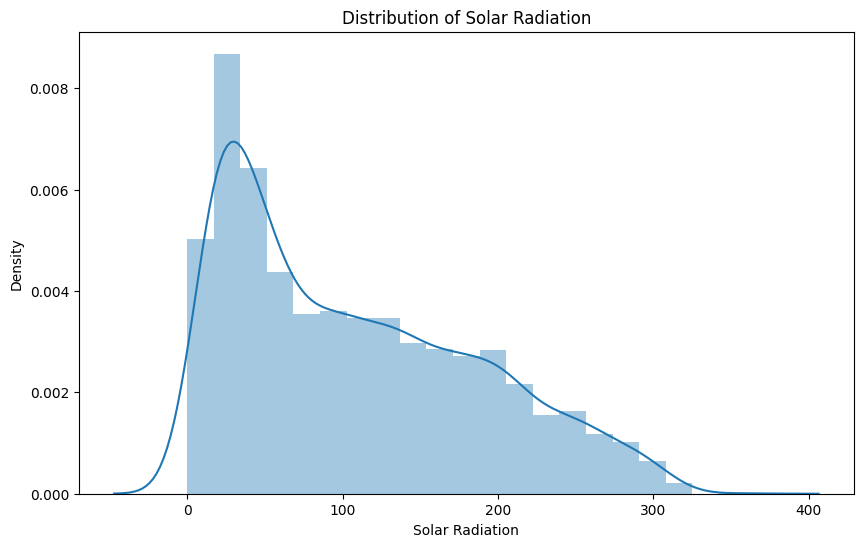

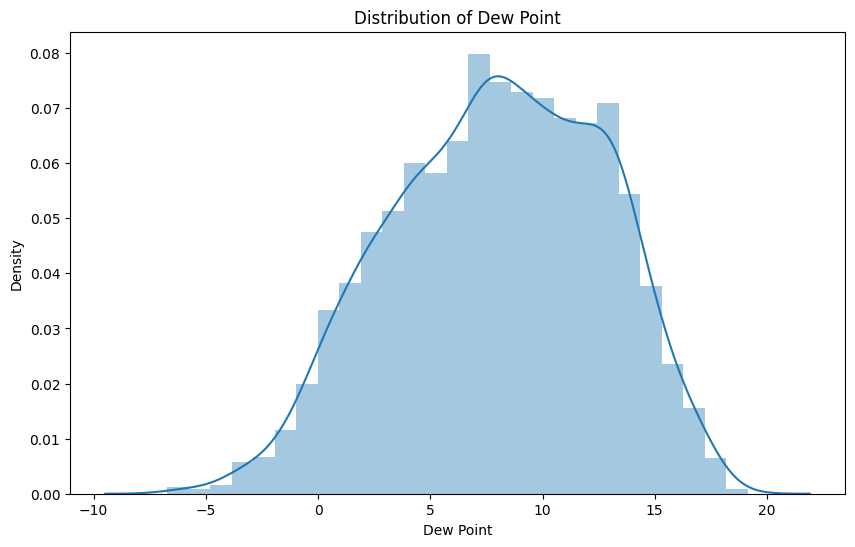

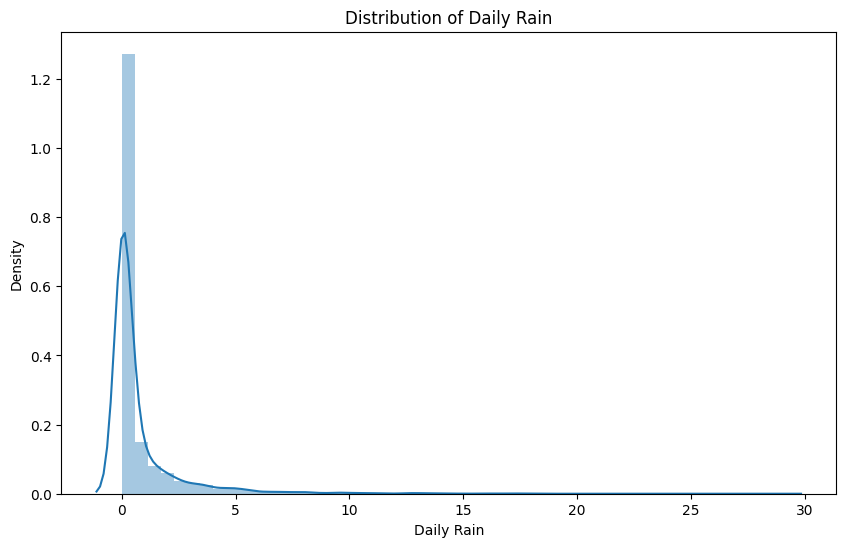

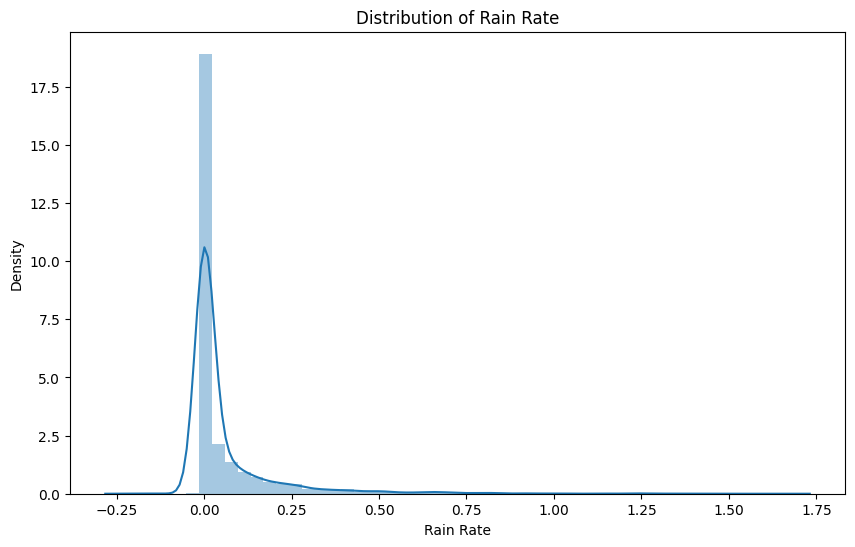

In [59]:
warnings.filterwarnings("ignore")
for k in daily_data_clean:
    plt.figure(figsize=(10, 6))
    sns.distplot(daily_data_clean[k])
    plt.title(f'Distribution of {k}')
    plt.show()

In [74]:
# Normalize the data
scaler_norm = MinMaxScaler()
norm_data = daily_data_clean.copy()
norm_data = scaler_norm.fit_transform(norm_data)
norm_data = pd.DataFrame(norm_data, columns=daily_data_clean.columns)

In [71]:
#Standardise the data
scaler_std = StandardScaler()
stan_data = daily_data_clean.copy()
stan_data = scaler_std.fit_transform(stan_data)
stan_data = pd.DataFrame(stan_data, columns=daily_data_clean.columns)

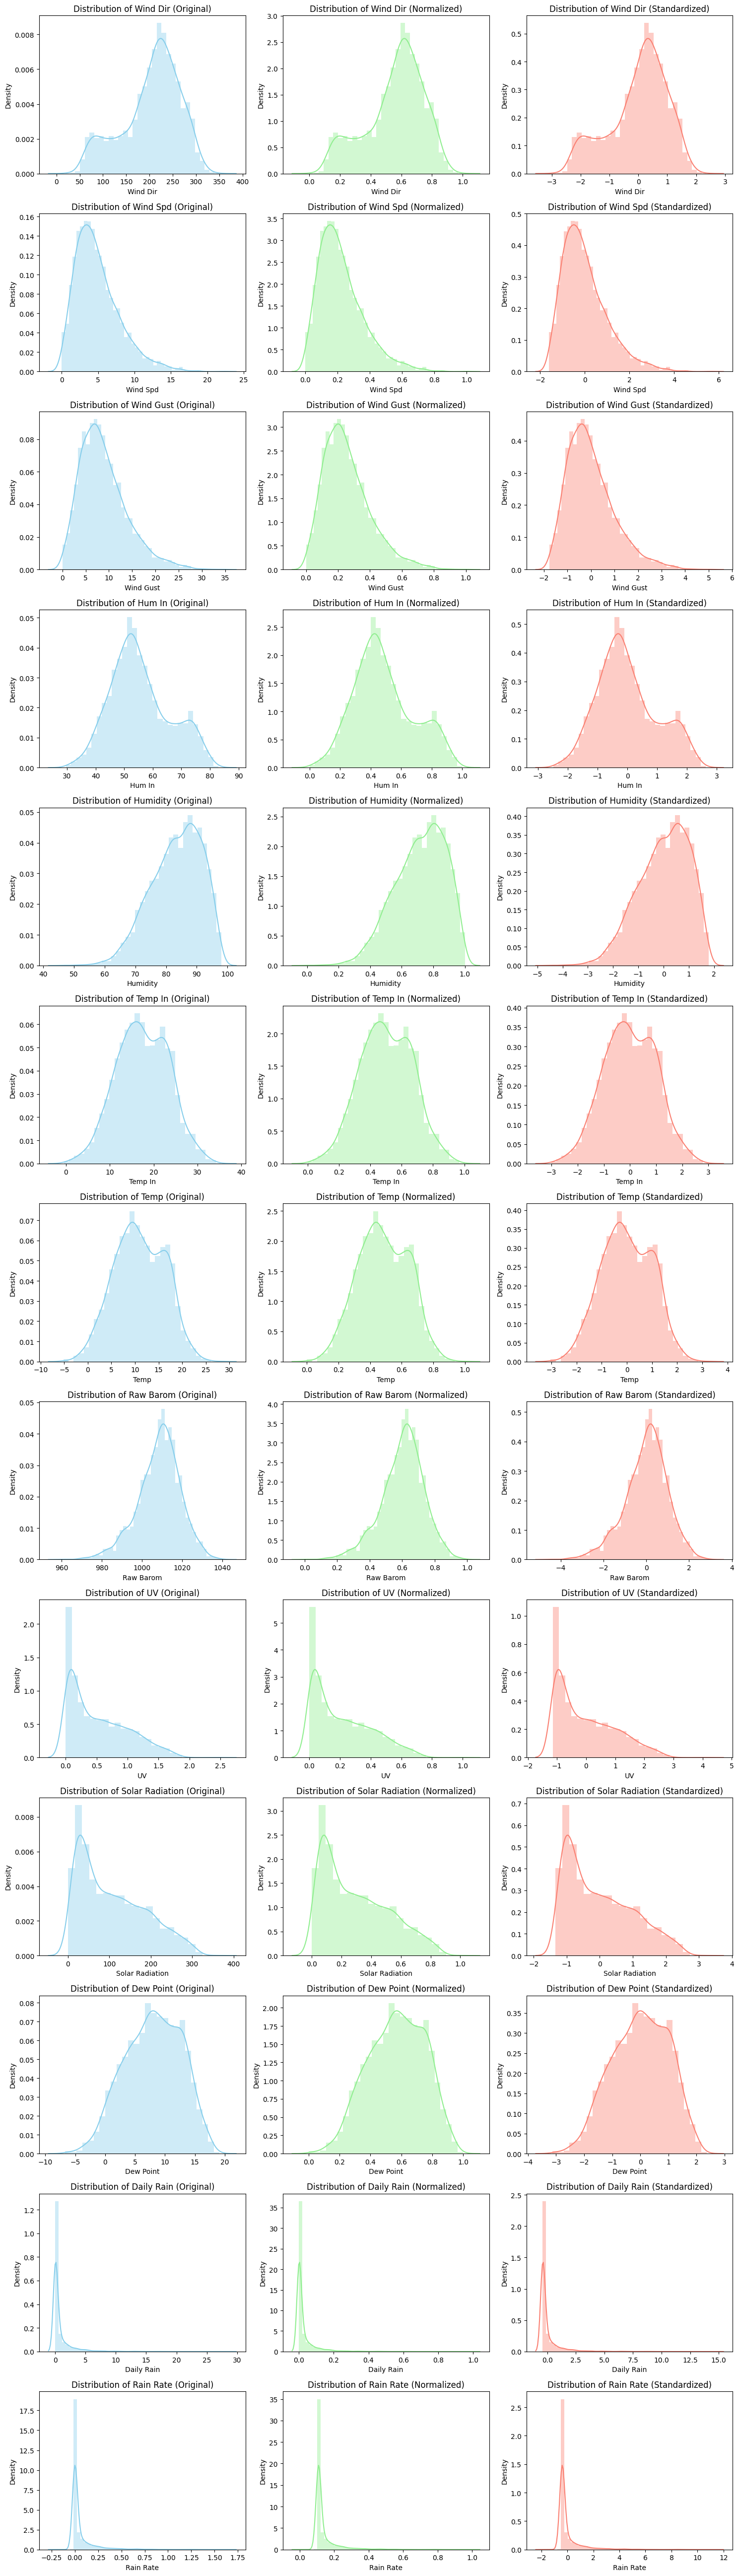

In [72]:
num_vars = len(daily_data_clean.columns)
fig, axes = plt.subplots(nrows=num_vars, ncols=3, figsize=(15, num_vars * 4))

for i, var in enumerate(daily_data_clean.columns):
    sns.distplot(daily_data_clean[var], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'Distribution of {var} (Original)')

    sns.distplot(norm_data[var], ax=axes[i, 1], kde=True, color='lightgreen')
    axes[i, 1].set_title(f'Distribution of {var} (Normalized)')

    sns.distplot(stan_data[var], ax=axes[i, 2], kde=True, color='salmon')
    axes[i, 2].set_title(f'Distribution of {var} (Standardized)')

# Adjust layout
plt.tight_layout()

# **MODEL** **DEVELOPMENT**

### **Multiple Linear Regression**

**Temperature**

In [131]:
X1 = daily_data_clean.drop(columns=['Wind Dir', 'Wind Gust', 'Hum In', 'Temp In', 'Temp', 'Raw Barom', 'Wind Spd', 'Daily Rain', 'Rain Rate'])
y1 = daily_data_clean['Temp']

# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=24)

In [132]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

LinearRegression()

In [133]:
c1 = lr1.intercept_
m1 = lr1.coef_
print('c1 =', c1)
print('m1 =', m1)

c1 = 19.49260424570219
m1 = [-0.20177262 -0.06817539  0.00136369  1.02237947]


In [134]:
y1_pred_test = lr1.predict(X1_test)

In [135]:
# Evaluate the model
mean_error = np.mean(y1_test - y1_pred_test)
mae = mean_absolute_error(y1_test, y1_pred_test)
mse = mean_squared_error(y1_test, y1_pred_test)
root_mean_squared_error = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred_test)

print(f"Mean Error (ME): {mean_error:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error:.2f}")
print(f'R² Score: {r2:.4f}')

Mean Error (ME): 0.01
MAE: 0.16
MSE: 0.07
Root Mean Squared Error (RMSE): 0.26
R² Score: 0.9978


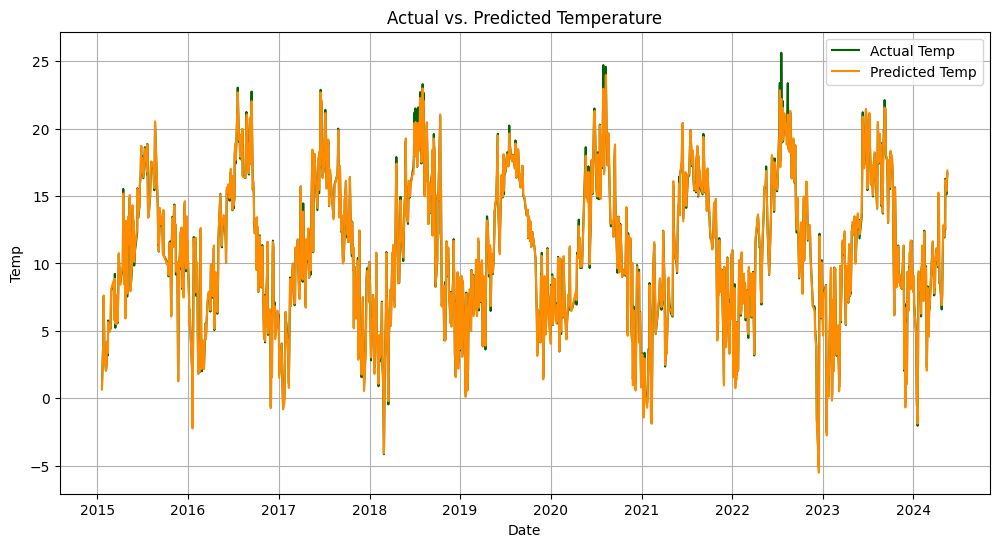

In [189]:
y1_pred_test = pd.Series(y1_pred_test, index=y1_test.index)
y1_test = y1_test.sort_index()
y1_pred_test = y1_pred_test.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(y1_test.index, y1_test, label='Actual Temp', color='darkgreen')
plt.plot(y1_pred_test.index, y1_pred_test, label='Predicted Temp', color='darkorange')

plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

**Humidity**

In [179]:
X2 = daily_data_clean.drop(columns=['Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Humidity', 'Temp In', 'Raw Barom', 'Dew Point', 'Rain Rate'])
y2 = daily_data_clean['Humidity']

# Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=24)

In [180]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [181]:
c2 = lr2.intercept_
m2 = lr2.coef_
print('c2 =', c2)
print('m2 =', m2)

c2 = 93.05745906877216
m2 = [-0.0603448  12.34319925 -0.14927198  0.42784739]


In [182]:
y2_pred_test = lr2.predict(X2_test)

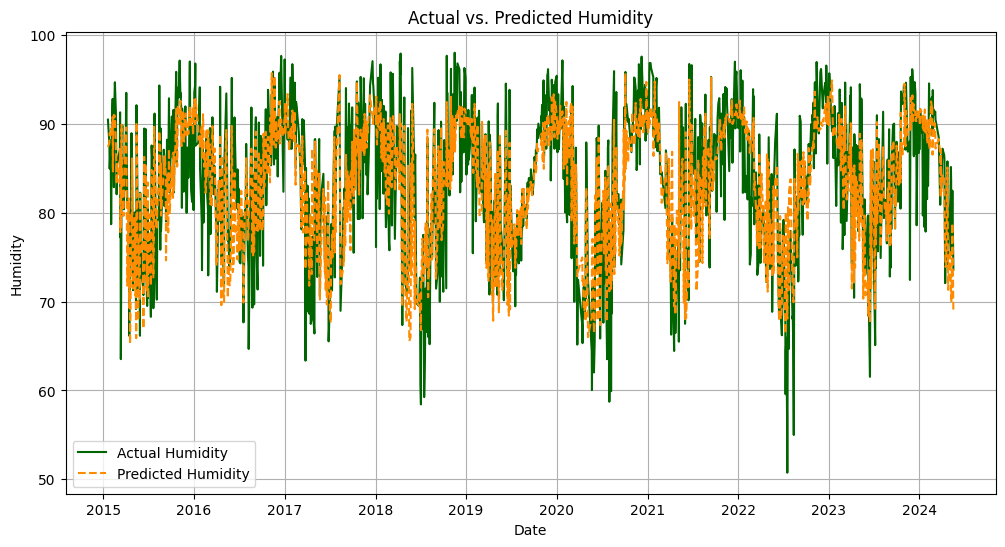

In [183]:
y2_pred_test = pd.Series(y2_pred_test, index=y2_test.index)
y2_test = y2_test.sort_index()
y2_pred_test = y2_pred_test.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(y2_test.index, y2_test, label='Actual Humidity', color='darkgreen')
plt.plot(y2_pred_test.index, y2_pred_test, label='Predicted Humidity', color='darkorange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Actual vs. Predicted Humidity')
plt.legend()
plt.grid(True)
plt.show()

In [184]:
# Evaluate the model
mean_error = np.mean(y2_test - y2_pred_test)
mae = mean_absolute_error(y2_test, y2_pred_test)
mse = mean_squared_error(y2_test, y2_pred_test)
root_mean_squared_error = np.sqrt(mse)
r2 = r2_score(y2_test, y2_pred_test)

print(f"Mean Error (ME): {mean_error:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error:.2f}")
print(f'R² Score: {r2:.4f}')

Mean Error (ME): 0.14
MAE: 3.70
MSE: 22.33
Root Mean Squared Error (RMSE): 4.73
R² Score: 0.6668


**Daily Rain**

In [185]:
X3 = daily_data_clean.drop(columns=['Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Temp In', 'Temp', 'UV', 'Dew Point', 'Daily Rain'])
y3 = daily_data_clean['Daily Rain']

# Split the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.4, random_state=24)

In [186]:
lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)

LinearRegression()

In [187]:
c3 = lr3.intercept_
m3 = lr3.coef_
print('c3 =', c3)
print('m3 =', m3)

c3 = 6.816203029713455
m3 = [ 2.97055475e-03 -6.76403305e-03 -9.02192551e-04  1.14777488e+01]


In [188]:
y3_pred_test = lr3.predict(X3_test)

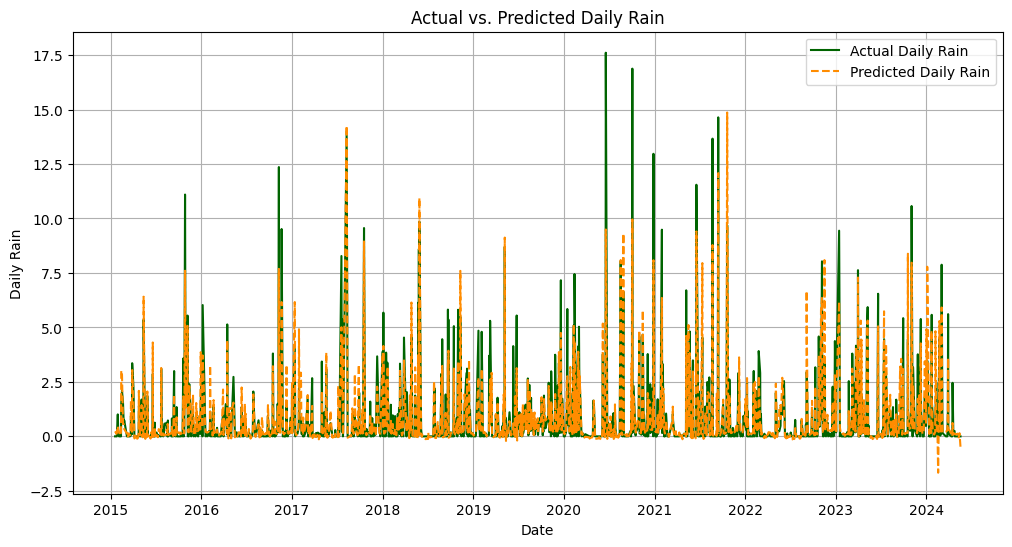

In [190]:
y3_pred_test = pd.Series(y3_pred_test, index=y3_test.index)
y3_test = y3_test.sort_index()
y3_pred_test = y3_pred_test.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(y3_test.index, y3_test, label='Actual Daily Rain', color='darkgreen')
plt.plot(y3_pred_test.index, y3_pred_test, label='Predicted Daily Rain', color='darkorange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Daily Rain')
plt.title('Actual vs. Predicted Daily Rain')
plt.legend()
plt.grid(True)
plt.show()

In [191]:
# Evaluate the model
mean_error = np.mean(y3_test - y3_pred_test)
mae = mean_absolute_error(y3_test, y3_pred_test)
mse = mean_squared_error(y3_test, y3_pred_test)
root_mean_squared_error = np.sqrt(mse)
r2 = r2_score(y3_test, y3_pred_test)

print(f"Mean Error (ME): {mean_error:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error:.2f}")
print(f'R² Score: {r2:.4f}')

Mean Error (ME): -0.00
MAE: 0.38
MSE: 0.65
Root Mean Squared Error (RMSE): 0.81
R² Score: 0.8036


## Not Sure

In [95]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Shuffle for randomness
# Using negative MSE because cross_val_score wants a score function, not a loss function
scores = cross_val_score(lr, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
mse_scores = -scores

print("MSE Scores for each fold: ", mse_scores)
print("Mean MSE: ", mse_scores.mean())
print("Standard Deviation of MSE: ", mse_scores.std())


MSE Scores for each fold:  [0.05517682 0.0533347  0.05846569 0.05806099 0.09177492]
Mean MSE:  0.06336262605556418
Standard Deviation of MSE:  0.014331173691781964


In [96]:
from sklearn.model_selection import cross_val_score, KFold
kf =KFold(n_splits=20)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_pred_train)
    fold_testing_error = mean_absolute_error(y_test, y_pred_test)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

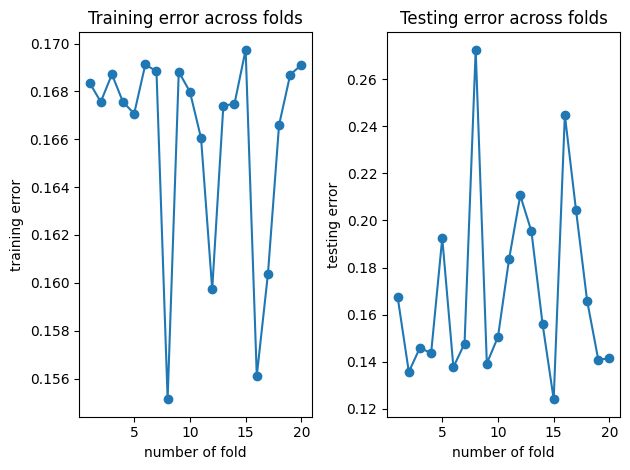

In [97]:
# Plot the mean absolute error (MAE) of the training phase and the MAE of the testing phase

plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np. array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt. ylabel('testing error')
plt. title('Testing error across folds')
plt. tight_layout()
plt. show()

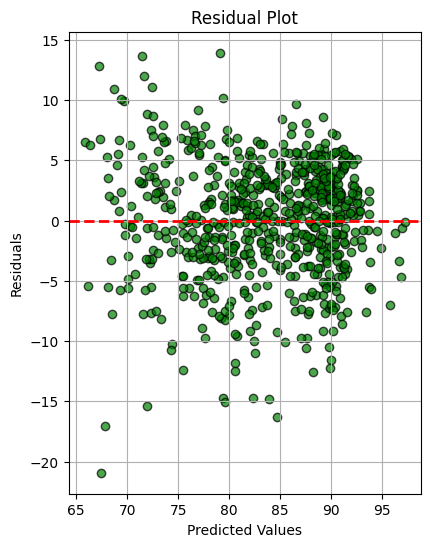

In [163]:
plt.figure(figsize=(10, 6))
residuals = y2_test - y2_pred_test
plt.subplot(1, 2, 2)
plt.scatter(y2_pred_test, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(0, linestyle='--', color='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

plt.show()